<b>Задание</b>
1. Восстановите пропуски в столбце kitchen_area. 
2. Добавьте информацию из датасета region.csv.
3. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2.
4. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.
5. Когда выгодно покупать/продавать объект недвижимости?
6. Создайте модель прогноза цены объекта недвижимости.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV

In [2]:
df = pd.read_csv('realty_18_21.csv', sep=',')
df

price        date  region  building_type  level  levels  rooms  \
0         6050000  2018-02-19    2661              1      8      10      3   
1         8650000  2018-02-27      81              3      5      24      2   
2         4000000  2018-02-28    2871              1      5       9      3   
3         1850000  2018-03-01    2843              4     12      16      2   
4         5450000  2018-03-01      81              3     13      14      2   
...           ...         ...     ...            ...    ...     ...    ...   
5477001  19739760  2021-05-01       3              1      8      17      4   
5477002  12503160  2021-05-01       3              2     17      32      2   
5477003   8800000  2021-05-01    2871              2      4      17      3   
5477004  11831910  2021-05-01       3              1      8      33      2   
5477005  13316200  2021-05-01       3              2     10      23      2   

         area  kitchen_area  object_type  
0        82.6          10.8            1  
1        69.1          12.0            1  
2        66.0          10.0            1  
3        38.0           5.0           11  
4        60.0          10.0            1  
...       ...           ...          ...  
5477001  93.2          13.8           11  
5477002  45.9           6.6           11  
5477003  86.5          11.8            1  
5477004  52.1          18.9           11  
5477005  55.6          20.8           11  

[5477006 rows x 10 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   region         int64  
 3   building_type  int64  
 4   level          int64  
 5   levels         int64  
 6   rooms          int64  
 7   area           float64
 8   kitchen_area   float64
 9   object_type    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 417.9+ MB


In [4]:
df['region'] = df['region'].astype(str) #преобразуем данные

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   region         object 
 3   building_type  int64  
 4   level          int64  
 5   levels         int64  
 6   rooms          int64  
 7   area           float64
 8   kitchen_area   float64
 9   object_type    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 417.9+ MB


In [6]:
#удалим 2018 год, чтобы компьютеру не было плохо
df = df[df['date'] >= '2019']
df = df.reset_index(drop=True)

In [7]:
#обработка значений в столбцах
df['date'] = pd.to_datetime(df['date'])
df.reset_index(inplace= True )
df

index     price       date region  building_type  level  levels  \
0              0   3100000 2019-01-01   2843              2      2       8   
1              1   1750000 2019-01-01   2843              2      2       4   
2              2   2300000 2019-01-01   2843              2     12      13   
3              3   3900000 2019-01-01   2843              3      4       5   
4              4   3450000 2019-01-01   2843              2      4      13   
...          ...       ...        ...    ...            ...    ...     ...   
4605420  4605420  19739760 2021-05-01      3              1      8      17   
4605421  4605421  12503160 2021-05-01      3              2     17      32   
4605422  4605422   8800000 2021-05-01   2871              2      4      17   
4605423  4605423  11831910 2021-05-01      3              1      8      33   
4605424  4605424  13316200 2021-05-01      3              2     10      23   

         rooms  area  kitchen_area  object_type  
0            1  35.0           9.0            1  
1            2  38.0           NaN            1  
2            1  34.1           8.6            1  
3            1  53.0          15.0            1  
4            2  57.0          15.0            1  
...        ...   ...           ...          ...  
4605420      4  93.2          13.8           11  
4605421      2  45.9           6.6           11  
4605422      3  86.5          11.8            1  
4605423      2  52.1          18.9           11  
4605424      2  55.6          20.8           11  

[4605425 rows x 11 columns]

In [8]:
columns_list = ['price',
 'building_type',
 'levels',
 'area',
 'object_type']

In [9]:
#удаляем невозможные значения
for i in columns_list:
    df = df[df[i] > 0]
    df = df.reset_index(drop=True)
df

index     price       date region  building_type  level  levels  \
0              0   3100000 2019-01-01   2843              2      2       8   
1              1   1750000 2019-01-01   2843              2      2       4   
2              2   2300000 2019-01-01   2843              2     12      13   
3              3   3900000 2019-01-01   2843              3      4       5   
4              4   3450000 2019-01-01   2843              2      4      13   
...          ...       ...        ...    ...            ...    ...     ...   
4343028  4605420  19739760 2021-05-01      3              1      8      17   
4343029  4605421  12503160 2021-05-01      3              2     17      32   
4343030  4605422   8800000 2021-05-01   2871              2      4      17   
4343031  4605423  11831910 2021-05-01      3              1      8      33   
4343032  4605424  13316200 2021-05-01      3              2     10      23   

         rooms  area  kitchen_area  object_type  
0            1  35.0           9.0            1  
1            2  38.0           NaN            1  
2            1  34.1           8.6            1  
3            1  53.0          15.0            1  
4            2  57.0          15.0            1  
...        ...   ...           ...          ...  
4343028      4  93.2          13.8           11  
4343029      2  45.9           6.6           11  
4343030      3  86.5          11.8            1  
4343031      2  52.1          18.9           11  
4343032      2  55.6          20.8           11  

[4343033 rows x 11 columns]

Проверка на наличие пропусков

In [10]:
df.isna().sum()

index                 0
price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     201026
object_type           0
dtype: int64

In [11]:
#заполняем пустые значения 0 для дальнейшей работы
df = df.fillna(0)

In [12]:
df[df['kitchen_area']==0]

index     price       date region  building_type  level  levels  \
1              1   1750000 2019-01-01   2843              2      2       4   
8             10   1400000 2019-01-01   2843              3      2       3   
9             12   2600000 2019-01-01   2843              3      1       2   
20            27    950000 2019-01-01   2843              3      1       1   
33            40   4600000 2019-01-01   2661              1      6       9   
...          ...       ...        ...    ...            ...    ...     ...   
4342946  4605321   7000000 2021-05-01   2604              3      3       4   
4342952  4605327   3200000 2021-05-01   2604              3      1       5   
4343007  4605398  23319120 2021-05-01      3              2      2      11   
4343010  4605401  13403880 2021-05-01      3              2      4      23   
4343011  4605402  11354820 2021-05-01      3              1     13      15   

         rooms   area  kitchen_area  object_type  
1            2  38.00           0.0            1  
8            1  33.00           0.0            1  
9            3  65.00           0.0            1  
20           2  26.60           0.0            1  
33           2  43.70           0.0            1  
...        ...    ...           ...          ...  
4342946      2  57.00           0.0            1  
4342952      1  47.90           0.0            1  
4343007      3  96.36           0.0           11  
4343010      2  59.10           0.0           11  
4343011      2  58.20           0.0           11  

[201026 rows x 11 columns]

Удаление из датафрейма странных и невозможных с точки логики значений.

In [13]:
df = df[df['kitchen_area'] >= 0]
df = df.reset_index(drop=True)
df

index     price       date region  building_type  level  levels  \
0              0   3100000 2019-01-01   2843              2      2       8   
1              1   1750000 2019-01-01   2843              2      2       4   
2              2   2300000 2019-01-01   2843              2     12      13   
3              3   3900000 2019-01-01   2843              3      4       5   
4              4   3450000 2019-01-01   2843              2      4      13   
...          ...       ...        ...    ...            ...    ...     ...   
4343028  4605420  19739760 2021-05-01      3              1      8      17   
4343029  4605421  12503160 2021-05-01      3              2     17      32   
4343030  4605422   8800000 2021-05-01   2871              2      4      17   
4343031  4605423  11831910 2021-05-01      3              1      8      33   
4343032  4605424  13316200 2021-05-01      3              2     10      23   

         rooms  area  kitchen_area  object_type  
0            1  35.0           9.0            1  
1            2  38.0           0.0            1  
2            1  34.1           8.6            1  
3            1  53.0          15.0            1  
4            2  57.0          15.0            1  
...        ...   ...           ...          ...  
4343028      4  93.2          13.8           11  
4343029      2  45.9           6.6           11  
4343030      3  86.5          11.8            1  
4343031      2  52.1          18.9           11  
4343032      2  55.6          20.8           11  

[4343033 rows x 11 columns]

In [14]:
#минимальная площадь жилого помещения
df = df[df['area'] >=6]
df = df.reset_index(drop=True)
df

index     price       date region  building_type  level  levels  \
0              0   3100000 2019-01-01   2843              2      2       8   
1              1   1750000 2019-01-01   2843              2      2       4   
2              2   2300000 2019-01-01   2843              2     12      13   
3              3   3900000 2019-01-01   2843              3      4       5   
4              4   3450000 2019-01-01   2843              2      4      13   
...          ...       ...        ...    ...            ...    ...     ...   
4338526  4605420  19739760 2021-05-01      3              1      8      17   
4338527  4605421  12503160 2021-05-01      3              2     17      32   
4338528  4605422   8800000 2021-05-01   2871              2      4      17   
4338529  4605423  11831910 2021-05-01      3              1      8      33   
4338530  4605424  13316200 2021-05-01      3              2     10      23   

         rooms  area  kitchen_area  object_type  
0            1  35.0           9.0            1  
1            2  38.0           0.0            1  
2            1  34.1           8.6            1  
3            1  53.0          15.0            1  
4            2  57.0          15.0            1  
...        ...   ...           ...          ...  
4338526      4  93.2          13.8           11  
4338527      2  45.9           6.6           11  
4338528      3  86.5          11.8            1  
4338529      2  52.1          18.9           11  
4338530      2  55.6          20.8           11  

[4338531 rows x 11 columns]

In [15]:
df = df[df['level'] <= df['levels']]
df = df.reset_index(drop=True)
df

index     price       date region  building_type  level  levels  \
0              0   3100000 2019-01-01   2843              2      2       8   
1              1   1750000 2019-01-01   2843              2      2       4   
2              2   2300000 2019-01-01   2843              2     12      13   
3              3   3900000 2019-01-01   2843              3      4       5   
4              4   3450000 2019-01-01   2843              2      4      13   
...          ...       ...        ...    ...            ...    ...     ...   
4338283  4605420  19739760 2021-05-01      3              1      8      17   
4338284  4605421  12503160 2021-05-01      3              2     17      32   
4338285  4605422   8800000 2021-05-01   2871              2      4      17   
4338286  4605423  11831910 2021-05-01      3              1      8      33   
4338287  4605424  13316200 2021-05-01      3              2     10      23   

         rooms  area  kitchen_area  object_type  
0            1  35.0           9.0            1  
1            2  38.0           0.0            1  
2            1  34.1           8.6            1  
3            1  53.0          15.0            1  
4            2  57.0          15.0            1  
...        ...   ...           ...          ...  
4338283      4  93.2          13.8           11  
4338284      2  45.9           6.6           11  
4338285      3  86.5          11.8            1  
4338286      2  52.1          18.9           11  
4338287      2  55.6          20.8           11  

[4338288 rows x 11 columns]

In [16]:
#проверка данных в столбцах
for col in ['rooms',
 'region',
 'building_type',
 'levels',
 'object_type']:
    print(df[col].unique())

[ 1  2  3  4  5 -1  6  9  7  8 -2 10]
['2843' '2661' '2722' '81' '13919' '6171' '9648' '3' '4007' '2604' '8090'
 '2922' '2900' '11171' '9654' '2871' '3991' '3019' '2860' '3446' '2359'
 '3230' '4417' '2072' '6817' '5282' '3870' '5520' '5368' '10160' '11991'
 '1010' '13913' '5241' '7793' '9579' '4982' '3106' '8509' '11416' '2594'
 '4963' '5178' '5789' '2885' '5143' '6309' '7929' '69' '6937' '2880'
 '4086' '5952' '2528' '7873' '4695' '7121' '2484' '4189' '4249' '14880'
 '5703' '5993' '7896' '821' '6543' '2328' '3153' '14368' '10582' '5736'
 '2806' '13098' '1491' '2814' '4374' '8894' '1901' '8640' '5794' '10201'
 '4240' '16705']
[2 3 4 1 5]
[ 8  4 13  5  3  2  6  7  1 10  9 25 17 12 16 11 15 18 14 19 20 22 23 24
 29 21 30 32 27 33 26 28 31 38 39 35 34 37 36]
[ 1 11]


In [17]:
#заменила
df.loc[df['object_type'] == 11, 'object_type'] = 2

In [18]:
#проверила что в этих строках - данные явно неправдивые + мало строк, поэтому удалю
df = df.loc[df['rooms'] != -2]

Удаляем выбросы

<AxesSubplot:>

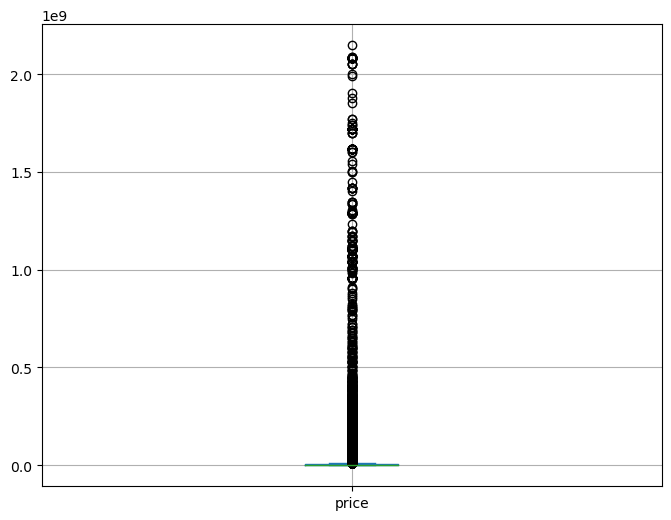

In [19]:
#построим график boxplot для того, чтобы проверить наличие выбросов
df['price'].plot(kind='box', figsize=(8, 6), grid=True)

In [20]:
df['price'].describe()

count    4.337984e+06
mean     4.607851e+06
std      1.511088e+07
min      1.000000e+00
25%      1.988999e+06
50%      3.000000e+06
75%      4.900000e+06
max      2.147484e+09
Name: price, dtype: float64

In [21]:
mu = df['price'].mean() # среднее значение
sigma = df['price'].std() # стандартное отклонение
# рассчитваем значение правого уса
ej_h = mu + 3 * sigma
ej_l = mu - 3 * sigma
print(ej_h, ej_l)

49940491.008367844 -40724788.923504926


In [22]:
#определим число выбросов
n_ejection = df['price'][df['price'] >= ej_h].count()
print('Число выбросов:', n_ejection)

Число выбросов: 11601


In [23]:
df = df[df['price'] < ej_h]
df = df.reset_index(drop=True)
df

index     price       date region  building_type  level  levels  \
0              0   3100000 2019-01-01   2843              2      2       8   
1              1   1750000 2019-01-01   2843              2      2       4   
2              2   2300000 2019-01-01   2843              2     12      13   
3              3   3900000 2019-01-01   2843              3      4       5   
4              4   3450000 2019-01-01   2843              2      4      13   
...          ...       ...        ...    ...            ...    ...     ...   
4326378  4605420  19739760 2021-05-01      3              1      8      17   
4326379  4605421  12503160 2021-05-01      3              2     17      32   
4326380  4605422   8800000 2021-05-01   2871              2      4      17   
4326381  4605423  11831910 2021-05-01      3              1      8      33   
4326382  4605424  13316200 2021-05-01      3              2     10      23   

         rooms  area  kitchen_area  object_type  
0            1  35.0           9.0            1  
1            2  38.0           0.0            1  
2            1  34.1           8.6            1  
3            1  53.0          15.0            1  
4            2  57.0          15.0            1  
...        ...   ...           ...          ...  
4326378      4  93.2          13.8            2  
4326379      2  45.9           6.6            2  
4326380      3  86.5          11.8            1  
4326381      2  52.1          18.9            2  
4326382      2  55.6          20.8            2  

[4326383 rows x 11 columns]

<AxesSubplot:>

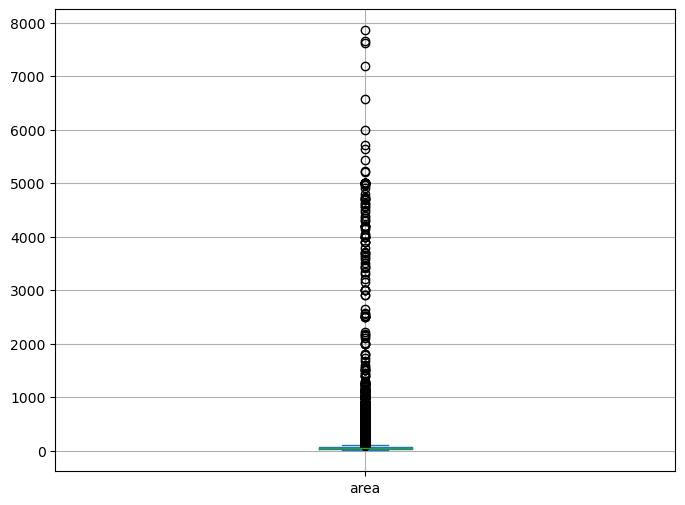

In [24]:
#построим график boxplot для того, чтобы проверить наличие выбросов
df['area'].plot(kind='box', figsize=(8, 6), grid=True)

In [25]:
max(df['area'])

7856.0

In [26]:
df[df['area'] == 7856.0] #явно бред

index    price       date region  building_type  level  levels  \
2409589  2546982  8490000 2020-03-09   2661              1      6       9   

         rooms    area  kitchen_area  object_type  
2409589      4  7856.0          10.0            1

In [27]:
mu = df['area'].mean() # среднее значение
sigma = df['area'].std() # стандартное отклонение
# рассчитваем значение правого уса
ej_h = mu + 3 * sigma
ej_l = mu - 3 * sigma
print(ej_h, ej_l)

152.06294155315211 -45.25157097420591


In [28]:
df = df[df['area'] < ej_h]
df = df.reset_index(drop=True)
df

index     price       date region  building_type  level  levels  \
0              0   3100000 2019-01-01   2843              2      2       8   
1              1   1750000 2019-01-01   2843              2      2       4   
2              2   2300000 2019-01-01   2843              2     12      13   
3              3   3900000 2019-01-01   2843              3      4       5   
4              4   3450000 2019-01-01   2843              2      4      13   
...          ...       ...        ...    ...            ...    ...     ...   
4305012  4605420  19739760 2021-05-01      3              1      8      17   
4305013  4605421  12503160 2021-05-01      3              2     17      32   
4305014  4605422   8800000 2021-05-01   2871              2      4      17   
4305015  4605423  11831910 2021-05-01      3              1      8      33   
4305016  4605424  13316200 2021-05-01      3              2     10      23   

         rooms  area  kitchen_area  object_type  
0            1  35.0           9.0            1  
1            2  38.0           0.0            1  
2            1  34.1           8.6            1  
3            1  53.0          15.0            1  
4            2  57.0          15.0            1  
...        ...   ...           ...          ...  
4305012      4  93.2          13.8            2  
4305013      2  45.9           6.6            2  
4305014      3  86.5          11.8            1  
4305015      2  52.1          18.9            2  
4305016      2  55.6          20.8            2  

[4305017 rows x 11 columns]

In [29]:
df = df[df['kitchen_area'] <= df['area']]
df = df.reset_index(drop=True)
df

index     price       date region  building_type  level  levels  \
0              0   3100000 2019-01-01   2843              2      2       8   
1              1   1750000 2019-01-01   2843              2      2       4   
2              2   2300000 2019-01-01   2843              2     12      13   
3              3   3900000 2019-01-01   2843              3      4       5   
4              4   3450000 2019-01-01   2843              2      4      13   
...          ...       ...        ...    ...            ...    ...     ...   
4303998  4605420  19739760 2021-05-01      3              1      8      17   
4303999  4605421  12503160 2021-05-01      3              2     17      32   
4304000  4605422   8800000 2021-05-01   2871              2      4      17   
4304001  4605423  11831910 2021-05-01      3              1      8      33   
4304002  4605424  13316200 2021-05-01      3              2     10      23   

         rooms  area  kitchen_area  object_type  
0            1  35.0           9.0            1  
1            2  38.0           0.0            1  
2            1  34.1           8.6            1  
3            1  53.0          15.0            1  
4            2  57.0          15.0            1  
...        ...   ...           ...          ...  
4303998      4  93.2          13.8            2  
4303999      2  45.9           6.6            2  
4304000      3  86.5          11.8            1  
4304001      2  52.1          18.9            2  
4304002      2  55.6          20.8            2  

[4304003 rows x 11 columns]

In [30]:
#уберу квартиры, стоимость которых ниже 10 000, так как дешевле квадртаный метр вряд ли может стоить, а выбросы из-за этого появиться могут
df = df[df['price'] > 10000]

In [31]:
df[df['kitchen_area']!=0]['kitchen_area'].describe()

count    4.102267e+06
mean     1.039086e+01
std      5.134593e+00
min      1.000000e-02
25%      7.000000e+00
50%      9.300000e+00
75%      1.230000e+01
max      1.300000e+02
Name: kitchen_area, dtype: float64

## 1. Восстановите пропуски в столбце kitchen_area.

Создадим новый датасет для дальнейшего заполнения пропусков.

In [32]:
df_new_cor = df[(df['kitchen_area'] !=0)]

In [33]:
df_new_cor  = df_new_cor [['area','price','levels','object_type','kitchen_area']]

In [34]:
df_new_cor.corr('kendall') #считаем корреляцию

C:\anaconda\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


area     price    levels  object_type  kitchen_area
area          1.000000  0.343761  0.071427     0.026976      0.367100
price         0.343761  1.000000  0.271887     0.031267      0.304747
levels        0.071427  0.271887  1.000000     0.339959      0.279777
object_type   0.026976  0.031267  0.339959     1.000000      0.208275
kitchen_area  0.367100  0.304747  0.279777     0.208275      1.000000

Заполним пропуски в стоблце 'kitchen_area' с помощью множественной линейной регресии

In [35]:
x=df_new_cor[['area','price','levels','object_type']]
y=df_new_cor['kitchen_area']

In [36]:
#разделяем данные на обучающую и валидационную выборку с random_state=13

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=13) 

In [37]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_train_st

array([[ 0.52007419, -0.59062457, -0.17949191,  1.60119679],
       [ 1.21150847, -0.26160412, -0.17949191, -0.62453285],
       [-0.9615707 , -0.40080508, -0.33480774, -0.62453285],
       ...,
       [ 0.22374521, -0.38815044, -0.95607104,  1.60119679],
       [ 0.63860578,  0.30785436,  0.59708722,  1.60119679],
       [-1.06034703, -0.29956802, -0.95607104, -0.62453285]])

In [38]:
df_x_st = pd.DataFrame(x_train_st, columns=['area','price','levels','object_type']) 

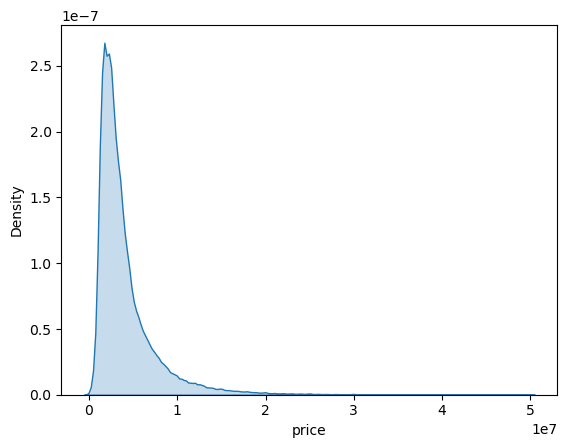

In [39]:
sns.kdeplot(df_new_cor['price'], fill=True)
plt.show()

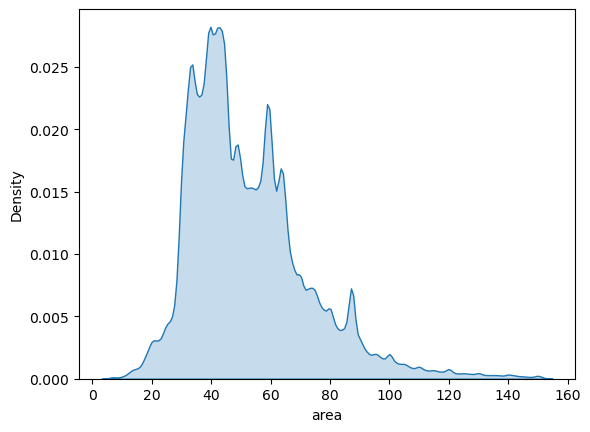

In [44]:
sns.kdeplot(df_new_cor['area'], fill=True)
plt.show()

Как видно, распределение данных ненормальное, что ожидаемо.


In [40]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)
y_train = np.array(y_train)

In [41]:
# создадим объект этого класса и запишем в переменную model
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

LinearRegression()

In [42]:
predictions = model.predict(x_test_st)

In [43]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [44]:
# проверяем r2
r2 = r2_score(y_test, predictions) 
r2
#детерминация слабая, но для того, чтобы заполнить пропуски - пойдет

0.3429931641865155

<AxesSubplot:xlabel='area', ylabel='kitchen_area'>

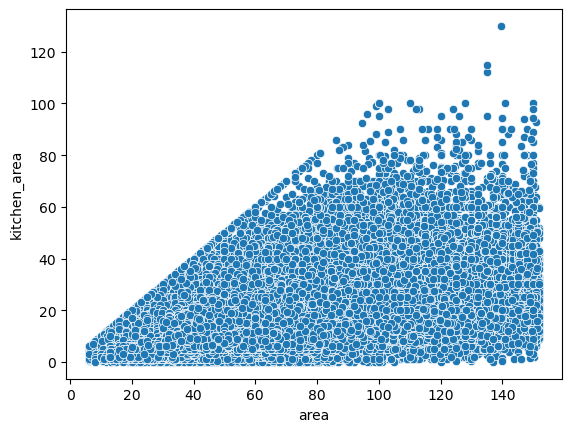

In [50]:
sns.scatterplot(data=df_new_cor, x='area', y='kitchen_area')

<AxesSubplot:xlabel='price', ylabel='kitchen_area'>

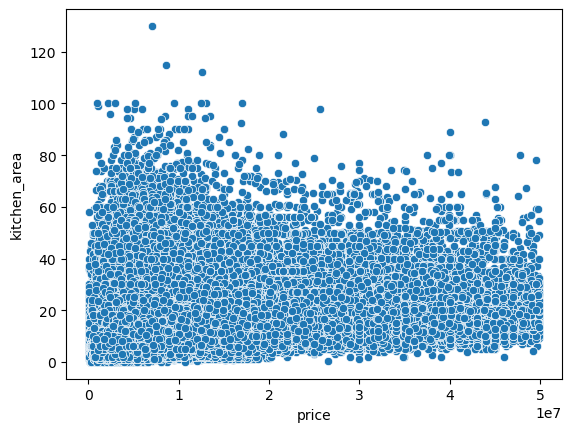

In [51]:
sns.scatterplot(data=df_new_cor, x='price', y='kitchen_area')

Как видно, из-за большого числа данных, они сильно разбросаны.

In [45]:
x=df[df['kitchen_area'] == 0][['area','price','levels','object_type']]
x_t= scaler.fit_transform(x)
predict = model.predict(x_t)
predict =[round(v,1) for v in predict]

In [46]:
list_index = df[df['kitchen_area'] == 0]['index'].tolist()

In [47]:
#заполняем значения
n = 0
for i in predict:
    df.loc[df['index'] == list_index[n],'kitchen_area'] = i
    n +=1

In [48]:
df

index     price       date region  building_type  level  levels  \
0              0   3100000 2019-01-01   2843              2      2       8   
1              1   1750000 2019-01-01   2843              2      2       4   
2              2   2300000 2019-01-01   2843              2     12      13   
3              3   3900000 2019-01-01   2843              3      4       5   
4              4   3450000 2019-01-01   2843              2      4      13   
...          ...       ...        ...    ...            ...    ...     ...   
4303998  4605420  19739760 2021-05-01      3              1      8      17   
4303999  4605421  12503160 2021-05-01      3              2     17      32   
4304000  4605422   8800000 2021-05-01   2871              2      4      17   
4304001  4605423  11831910 2021-05-01      3              1      8      33   
4304002  4605424  13316200 2021-05-01      3              2     10      23   

         rooms  area  kitchen_area  object_type  
0            1  35.0           9.0            1  
1            2  38.0           7.1            1  
2            1  34.1           8.6            1  
3            1  53.0          15.0            1  
4            2  57.0          15.0            1  
...        ...   ...           ...          ...  
4303998      4  93.2          13.8            2  
4303999      2  45.9           6.6            2  
4304000      3  86.5          11.8            1  
4304001      2  52.1          18.9            2  
4304002      2  55.6          20.8            2  

[4301434 rows x 11 columns]

In [49]:
df['kitchen_area'].describe()

count    4.301434e+06
mean     1.039086e+01
std      5.056179e+00
min      1.000000e-02
25%      7.000000e+00
50%      9.400000e+00
75%      1.220000e+01
max      1.300000e+02
Name: kitchen_area, dtype: float64

Как видно, описательные характеристики особо не изменились, значит так пропуски заполнить можно.

## 2. Добавьте информацию из датасета region.csv.

In [52]:
df_new = df

In [53]:
new_data = pd.read_csv('region.csv', sep=',',names=['region','reg_name'])
new_data = new_data.drop(labels = [0],axis = 0)
new_data

region                      reg_name
1    2661               Санкт-Петербург
2    3446         Ленинградская область
3       3                        Москва
4      81            Московская область
5    2843            Краснодарский край
..    ...                           ...
79  16705           Магаданская область
80     69  Еврейская автономная область
81   4963               Приморский край
82   1901           Сахалинская область
83  61888     Ненецкий автономный округ

[83 rows x 2 columns]

In [54]:
region = new_data['reg_name'].unique().tolist()

In [55]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 1 to 83
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   region    83 non-null     object
 1   reg_name  83 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [56]:
df_unique_code = df_new['region'].unique().tolist()

In [57]:
df_unique_code_1 = new_data['region'].unique().tolist()


In [58]:
set(df_unique_code) - set(df_unique_code_1) #как видно, существует строка, в которой в графе код содержится сразу 2 региона. Нужно исправить.

{'6937', '7873'}

In [59]:
new_data[new_data['region'] =='7873, 6937']

region         reg_name
37  7873, 6937  Республика Крым

In [60]:
#обработаем данные значения
new_data.loc[new_data['region'] =='7873, 6937','region'] = '7873'
new_data.loc[len(new_data.index)] = ['6937','Республика Крым']
new_data

region                      reg_name
1    2661               Санкт-Петербург
2    3446         Ленинградская область
3       3                        Москва
4      81            Московская область
5    2843            Краснодарский край
..    ...                           ...
79  16705           Магаданская область
80     69  Еврейская автономная область
81   4963               Приморский край
82   1901           Сахалинская область
83   6937               Республика Крым

[83 rows x 2 columns]

In [61]:
#проверим наличия соотв кодов в исходном датасете
df_new[df_new['region'] == '7873']

index     price       date region  building_type  level  levels  \
100721    106026   6500000 2019-01-22   7873              3      6       6   
328074    344620   4150000 2019-02-24   7873              4      1       2   
328088    344636   3610000 2019-02-24   7873              4      4       5   
328089    344637   5900000 2019-02-24   7873              1      6       9   
328090    344638   3300000 2019-02-24   7873              1      9       9   
...          ...       ...        ...    ...            ...    ...     ...   
4228278  4518907   6800000 2021-04-24   7873              4      8       9   
4232947  4523721  10700000 2021-04-25   7873              2      2      10   
4243692  4535736   6300000 2021-04-26   7873              4      1       5   
4270182  4566726   7000000 2021-04-29   7873              2      2      10   
4284320  4582852   1400000 2021-04-30   7873              2      2       3   

         rooms  area  kitchen_area  object_type             m2  
100721       3  80.0          12.0            1   81250.000000  
328074       2  43.0           6.0            1   96511.627907  
328088       2  44.0           6.0            1   82045.454545  
328089       4  73.6           8.0            1   80163.043478  
328090       1  40.8           8.0            1   80882.352941  
...        ...   ...           ...          ...            ...  
4228278      3  72.0          13.0            1   94444.444444  
4232947      3  96.0          16.0            1  111458.333333  
4243692      1  43.0           9.0            1  146511.627907  
4270182      2  63.0          14.0            1  111111.111111  
4284320     -1  22.0           5.1            1   63636.363636  

[1899 rows x 12 columns]

In [62]:
df_new[df_new['region'] == '6937']

index     price       date region  building_type  level  levels  \
56598      59610   2600000 2019-01-15   6937              3      4       6   
71104      74745   2000000 2019-01-17   6937              1      5       5   
98130     103372  12000000 2019-01-22   6937              2      2      11   
122786    129507   2300000 2019-01-25   6937              1      5       5   
637000    676354   1500000 2019-04-06   6937              4      2       3   
...          ...       ...        ...    ...            ...    ...     ...   
4302695  4603948   9500000 2021-05-01   6937              2      6       9   
4303227  4604515   4500000 2021-05-01   6937              1      5       5   
4303238  4604526   7200000 2021-05-01   6937              4      9       9   
4303914  4605318   4400000 2021-05-01   6937              4      2       5   
4303928  4605342  15500000 2021-05-01   6937              2      6       7   

         rooms  area  kitchen_area  object_type             m2  
56598        1  40.0          20.0            1   65000.000000  
71104        1  32.1           6.6            1   62305.295950  
98130        2  73.0           9.0            1  164383.561644  
122786       2  46.0           6.0            1   50000.000000  
637000      -1  21.0           2.0            2   71428.571429  
...        ...   ...           ...          ...            ...  
4302695      3  76.0          10.0            1  125000.000000  
4303227      3  54.0           5.0            1   83333.333333  
4303238      3  70.0          40.0            1  102857.142857  
4303914      3  64.0           6.2            1   68750.000000  
4303928      2  82.0          38.7            2  189024.390244  

[4197 rows x 12 columns]

In [63]:
#объединяем
df_new = df_new.merge(new_data, on='region')
df_new

index     price       date region  building_type  level  levels  \
0              0   3100000 2019-01-01   2843              2      2       8   
1              1   1750000 2019-01-01   2843              2      2       4   
2              2   2300000 2019-01-01   2843              2     12      13   
3              3   3900000 2019-01-01   2843              3      4       5   
4              4   3450000 2019-01-01   2843              2      4      13   
...          ...       ...        ...    ...            ...    ...     ...   
4301429  4502467   2700000 2021-04-21  16705              3      2       5   
4301430  4503414   4550000 2021-04-22  16705              4      3       5   
4301431  4531588   2400000 2021-04-26  16705              4      2       5   
4301432  4534822   6550000 2021-04-26  16705              4      4       5   
4301433  4583404  14500000 2021-04-30  16705              4      5       9   

         rooms  area  kitchen_area  object_type             m2  \
0            1  35.0           9.0            1   88571.428571   
1            2  38.0           7.1            1   46052.631579   
2            1  34.1           8.6            1   67448.680352   
3            1  53.0          15.0            1   73584.905660   
4            2  57.0          15.0            1   60526.315789   
...        ...   ...           ...          ...            ...   
4301429      2  42.0           6.1            1   64285.714286   
4301430      3  56.0           6.0            1   81250.000000   
4301431      1  32.0           9.1            1   75000.000000   
4301432      3  69.0           9.5            1   94927.536232   
4301433      3  73.0          10.0            1  198630.136986   

                    reg_name  
0         Краснодарский край  
1         Краснодарский край  
2         Краснодарский край  
3         Краснодарский край  
4         Краснодарский край  
...                      ...  
4301429  Магаданская область  
4301430  Магаданская область  
4301431  Магаданская область  
4301432  Магаданская область  
4301433  Магаданская область  

[4301434 rows x 13 columns]

In [64]:
df = df_new

In [65]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['y_month'] = df['date'].dt.year.astype(str) + '.' + df['date'].dt.month.astype(str)
df

index     price       date region  building_type  level  levels  \
0              0   3100000 2019-01-01   2843              2      2       8   
1              1   1750000 2019-01-01   2843              2      2       4   
2              2   2300000 2019-01-01   2843              2     12      13   
3              3   3900000 2019-01-01   2843              3      4       5   
4              4   3450000 2019-01-01   2843              2      4      13   
...          ...       ...        ...    ...            ...    ...     ...   
4301429  4502467   2700000 2021-04-21  16705              3      2       5   
4301430  4503414   4550000 2021-04-22  16705              4      3       5   
4301431  4531588   2400000 2021-04-26  16705              4      2       5   
4301432  4534822   6550000 2021-04-26  16705              4      4       5   
4301433  4583404  14500000 2021-04-30  16705              4      5       9   

         rooms  area  kitchen_area  object_type             m2  \
0            1  35.0           9.0            1   88571.428571   
1            2  38.0           7.1            1   46052.631579   
2            1  34.1           8.6            1   67448.680352   
3            1  53.0          15.0            1   73584.905660   
4            2  57.0          15.0            1   60526.315789   
...        ...   ...           ...          ...            ...   
4301429      2  42.0           6.1            1   64285.714286   
4301430      3  56.0           6.0            1   81250.000000   
4301431      1  32.0           9.1            1   75000.000000   
4301432      3  69.0           9.5            1   94927.536232   
4301433      3  73.0          10.0            1  198630.136986   

                    reg_name  year  month y_month  
0         Краснодарский край  2019      1  2019.1  
1         Краснодарский край  2019      1  2019.1  
2         Краснодарский край  2019      1  2019.1  
3         Краснодарский край  2019      1  2019.1  
4         Краснодарский край  2019      1  2019.1  
...                      ...   ...    ...     ...  
4301429  Магаданская область  2021      4  2021.4  
4301430  Магаданская область  2021      4  2021.4  
4301431  Магаданская область  2021      4  2021.4  
4301432  Магаданская область  2021      4  2021.4  
4301433  Магаданская область  2021      4  2021.4  

[4301434 rows x 16 columns]

Все супер, число срок не сократилось.

## 3. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2.

Проверим сколько в среднем стоил квадратный метр в каждом из годов.

In [50]:
df['m2'] = df['price']/df['area']


C:\Users\Админ\AppData\Local\Temp\ipykernel_13952\1212572179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['m2'] = df['price']/df['area']


In [86]:
m_p_2019_per = df[(df['year'] == 2019)&(df['object_type'] == 2)]['m2'].mean()
m_p_2019_sec = df[(df['year'] == 2019)&(df['object_type'] == 1)]['m2'].mean()
print(m_p_2019_per , m_p_2019_sec)

66078.26844567123 69521.5425210051


In [87]:
m_p_2020_per = df[(df['year'] == 2020)&(df['object_type'] == 2)]['m2'].mean()
m_p_2020_sec = df[(df['year'] == 2020)&(df['object_type'] == 1)]['m2'].mean()
print(m_p_2020_per , m_p_2020_sec)

101697.2905244214 78916.40153888204


In [88]:
m_p_2021_per = df[(df['year'] == 2021)&(df['object_type'] == 2)]['m2'].mean()
m_p_2021_sec = df[(df['year'] == 2021)&(df['object_type'] == 1)]['m2'].mean()
print(m_p_2021_per , m_p_2021_sec)

128320.24872177905 96020.63604280213


Динамика - рост средней стоимости одного квадратного метра по всем регионам как на вторичном, так и на первичном рынках.

Создадим датасет, в котором данная величина будет рассчитана для каждого из регионов (отдельно для вторичного и первичного рынков).

In [89]:
df_m2_per = pd.DataFrame({'year': [],
 'region': [],
 'm2': []}) #первичный рынок
df_m2_sec = pd.DataFrame({'year': [],
 'region': [],
 'm2': []}) #вторичный рынок


In [90]:
for i in region:
    for y in [2019, 2020, 2021]:
        n =  round(df[(df['year'] == y)&(df['reg_name'] == i)&(df['object_type'] == 2)]['m2'].mean(), 2)
        df_m2_per.loc[len(df_m2_per.index)] = [y,i, n]
for i in region:
    for y in [2019, 2020, 2021]:
        n =  round(df[(df['year'] == y)&(df['reg_name'] == i)&(df['object_type'] == 1)]['m2'].mean(), 2)
        df_m2_sec.loc[len(df_m2_sec.index)] = [y,i, n]

In [91]:
df_m2_sec

year                     region         m2
0    2019            Санкт-Петербург  118981.88
1    2020            Санкт-Петербург  129172.64
2    2021            Санкт-Петербург  160275.65
3    2019      Ленинградская область   70570.81
4    2020      Ленинградская область   86067.21
..    ...                        ...        ...
244  2020        Сахалинская область  135416.67
245  2021        Сахалинская область        NaN
246  2019  Ненецкий автономный округ        NaN
247  2020  Ненецкий автономный округ        NaN
248  2021  Ненецкий автономный округ        NaN

[249 rows x 3 columns]

In [92]:
df_m2_per

year                     region         m2
0    2019            Санкт-Петербург  117071.88
1    2020            Санкт-Петербург  135823.11
2    2021            Санкт-Петербург  180814.06
3    2019      Ленинградская область   77805.35
4    2020      Ленинградская область   89444.54
..    ...                        ...        ...
244  2020        Сахалинская область        NaN
245  2021        Сахалинская область        NaN
246  2019  Ненецкий автономный округ        NaN
247  2020  Ненецкий автономный округ        NaN
248  2021  Ненецкий автономный округ        NaN

[249 rows x 3 columns]

Отразим динамику на графике.

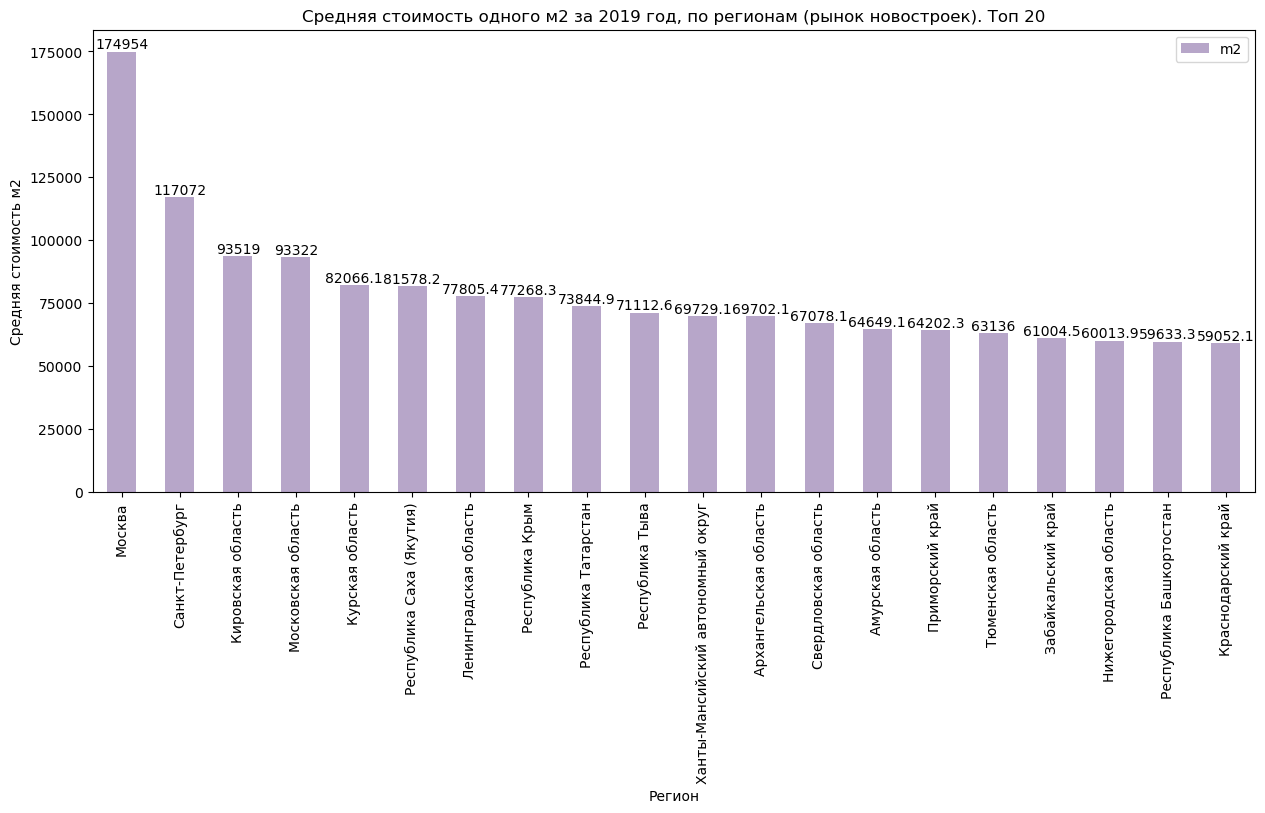

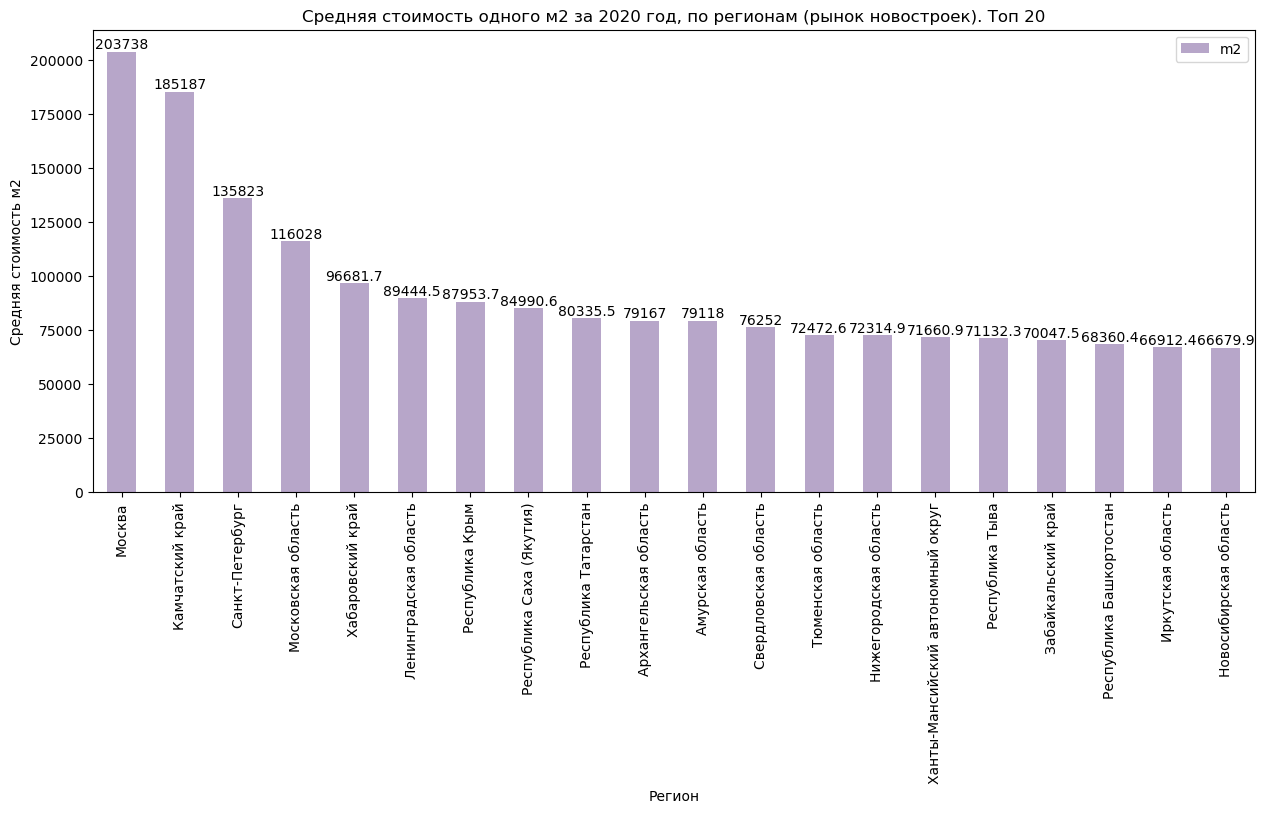

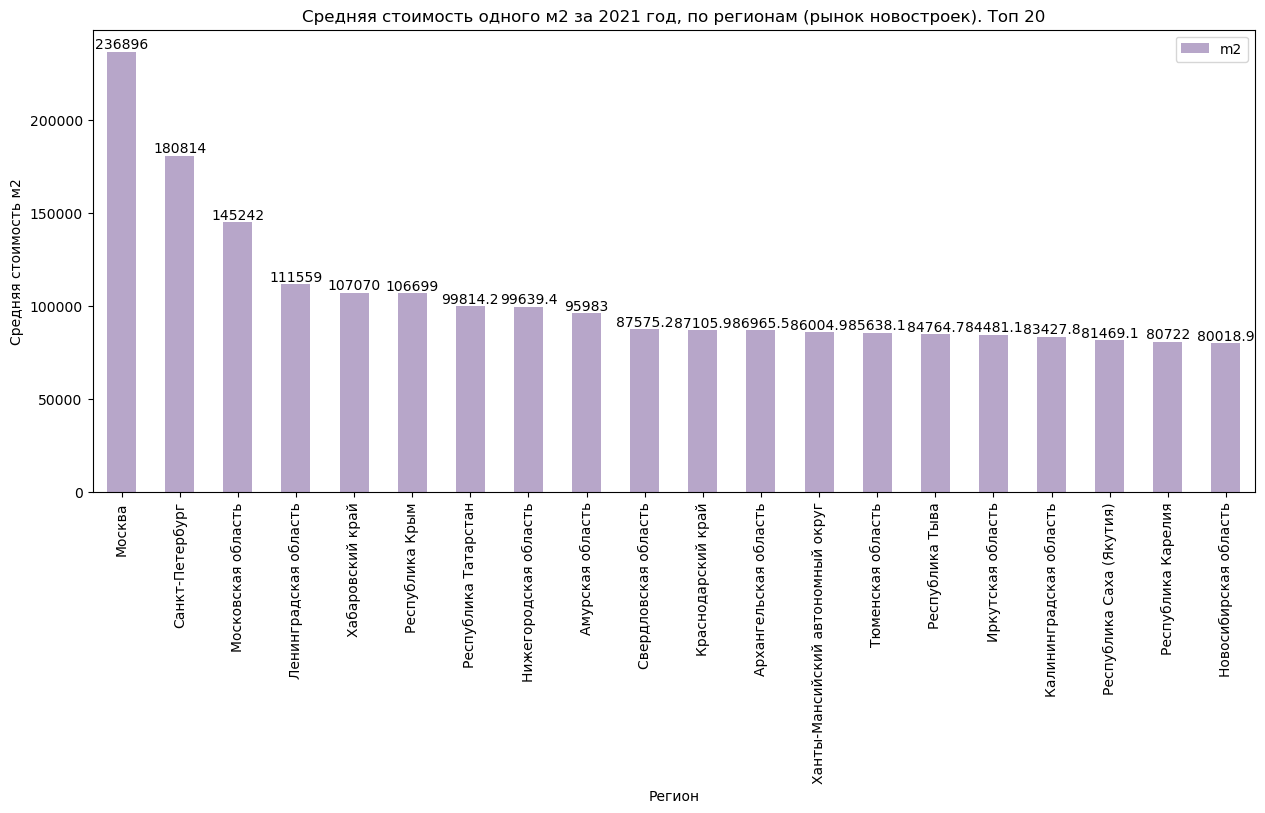

In [93]:
for i in [2019, 2020, 2021]:
    ax = df_m2_per[df_m2_per['year'] == i].sort_values('m2', axis=0, ascending=False).head(20).plot(kind ='bar', x='region', y = 'm2',title=f'Средняя стоимость одного м2 за {i} год, по регионам (рынок новостроек). Топ 20', figsize=(15, 6), color=(0.6, 0.5, 0.7, 0.7),xlabel='Регион',ylabel='Средняя стоимость м2')
    ax.bar_label(ax.containers[0])
    plt.show()

Как видно, первые места в топе в кажом из годов занимают Москва, Московская область, Санкт-Петербург и Ленинградская область. Что вполне очевидно, так как это столица и город 2 уровня по значимости в стране. Также лидирующие позиции занимают северные и примоские регионы.

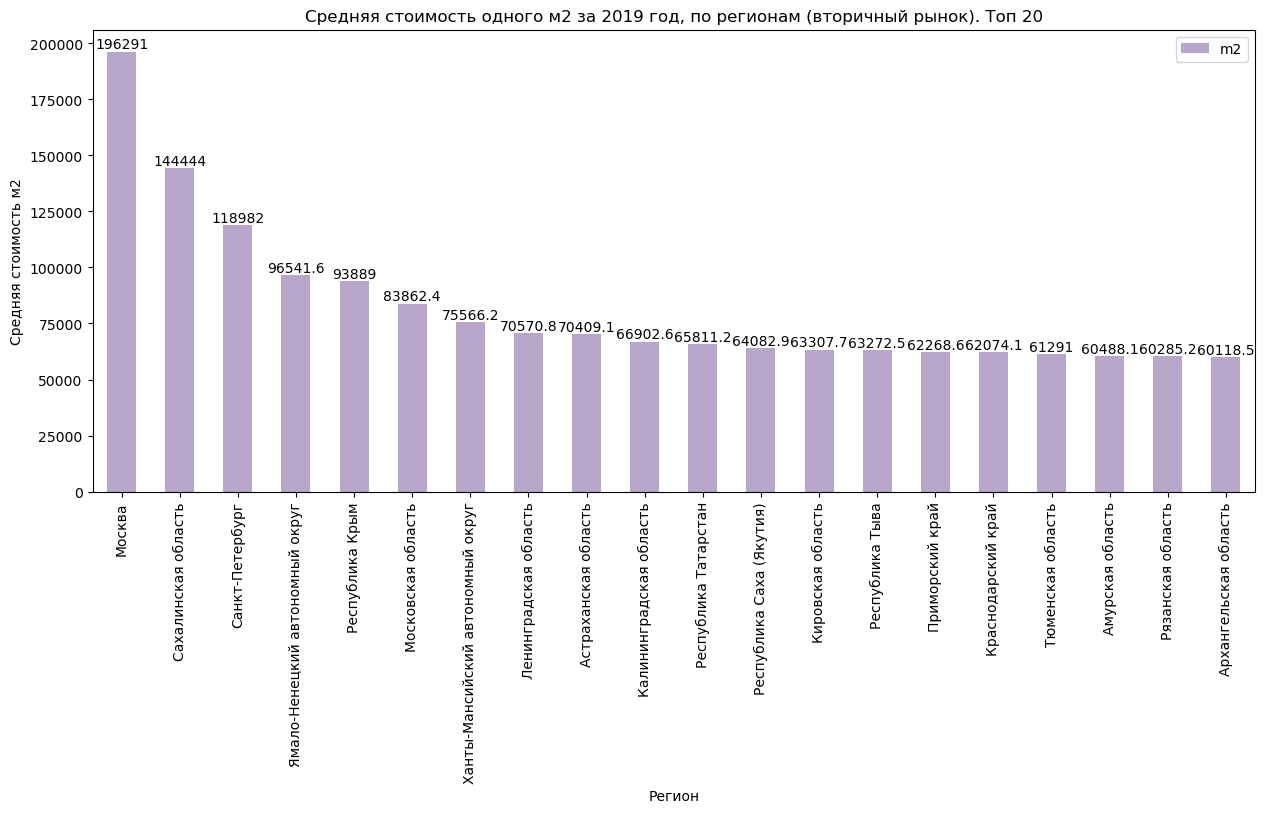

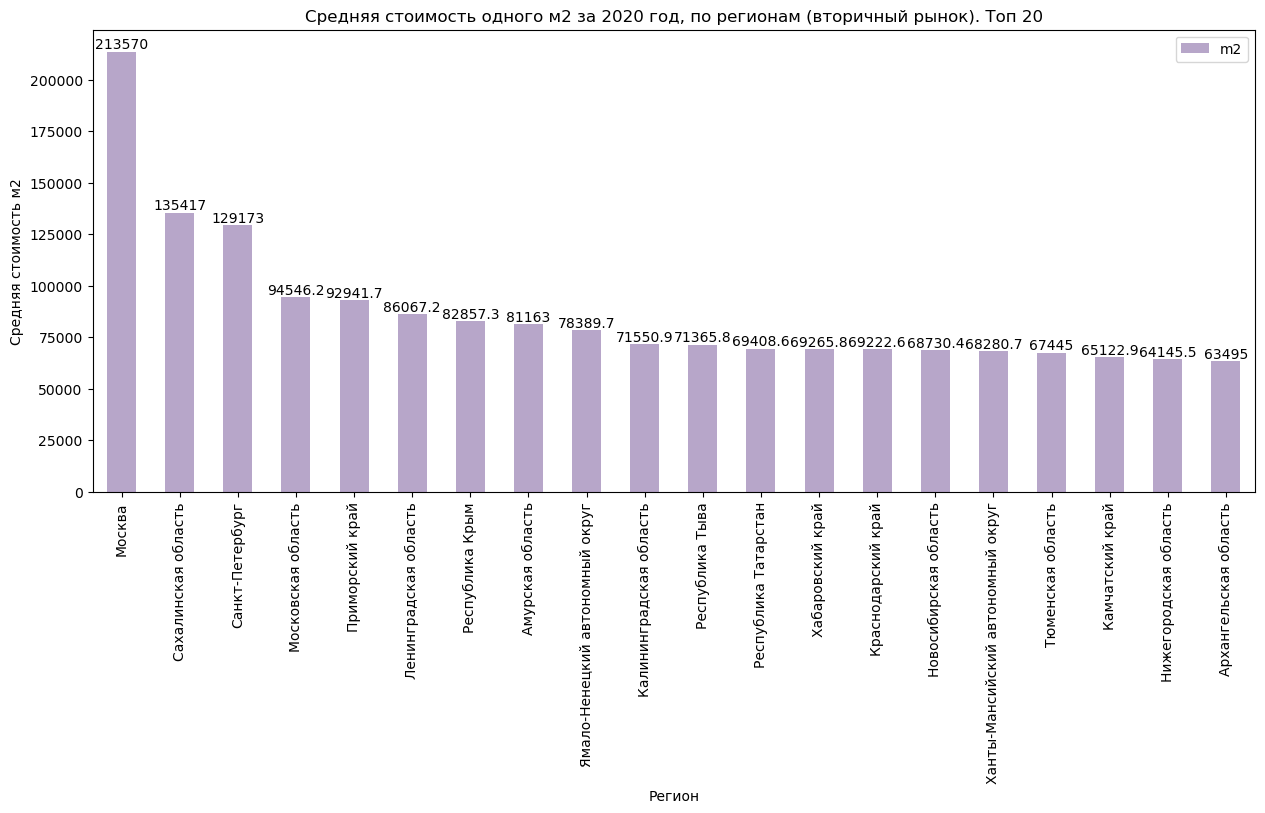

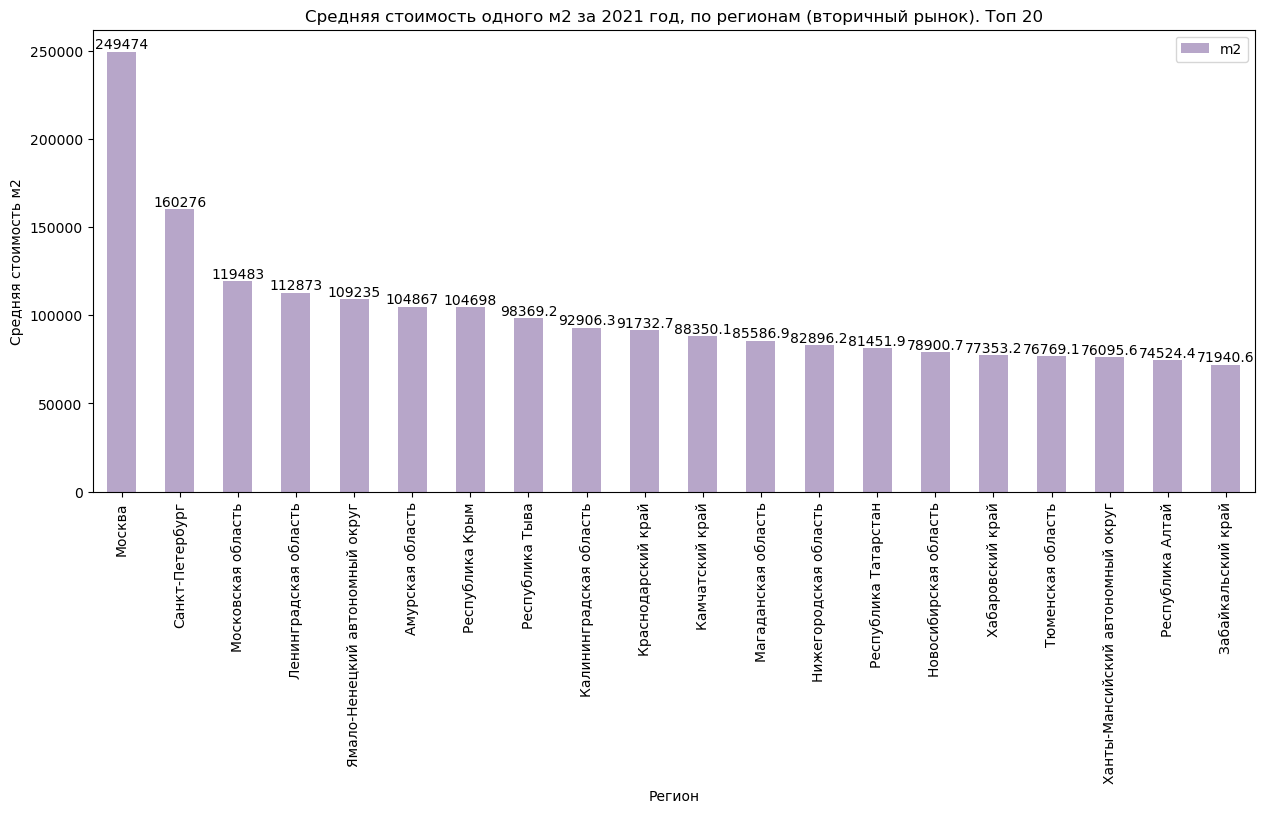

In [94]:
for i in [2019, 2020, 2021]:
    ax = df_m2_sec[df_m2_sec['year'] == i].sort_values('m2', axis=0, ascending=False).head(20).plot(kind ='bar', x='region', y = 'm2',title=f'Средняя стоимость одного м2 за {i} год, по регионам (вторичный рынок). Топ 20', figsize=(15, 6), color=(0.6, 0.5, 0.7, 0.7),xlabel='Регион',ylabel='Средняя стоимость м2')
    ax.bar_label(ax.containers[0])
    plt.show()

Динамика схожа. Однако, видно, что стоимость за один квадратный метр значительно выше в отдельных регионах, что странно.

Данный способ оценки не достаточно точен, так как стоимость жилья зависит от многих факторов: качество сделанного ремонта, района, сезона продажи и так далее. К тому же от политиики государства в данной сфере. Однако, данный анализ позволяет проследить общую динамику. 

In [95]:
df[(df['year'] == 2019)&(df['reg_name'] == 'Москва')&(df['object_type'] == 2)]['m2'].mean()

174953.9500663618

In [96]:
df[(df['year'] == 2019)&(df['reg_name'] == 'Москва')&(df['object_type'] == 1)]['m2'].mean()

196290.51583402668

Вот, например, в Москве жилье на вторичном рынке дороже, чем на первичном. Ну это вполне логично, во-первых, чаще всего вторичное жилье - это не новостройки, так что мб это квартиры в цетре москвы. Во-торых, льготная ипотека еще не введена.

## 4. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.

In [97]:
df.corr('spearman')

index     price  building_type     level    levels  \
index          1.000000  0.234757       0.090437  0.042458  0.044742   
price          0.234757  1.000000       0.065794  0.265314  0.383828   
building_type  0.090437  0.065794       1.000000 -0.083474 -0.166298   
level          0.042458  0.265314      -0.083474  1.000000  0.606986   
levels         0.044742  0.383828      -0.166298  0.606986  1.000000   
rooms          0.032487  0.392129       0.033969 -0.047721 -0.129715   
area          -0.010682  0.490985       0.002469  0.080796  0.099765   
kitchen_area   0.047418  0.438036       0.075622  0.254149  0.389151   
object_type   -0.051793  0.038248      -0.124860  0.225931  0.398081   
year           0.906315  0.216310       0.087738  0.039016  0.039745   
month          0.256129  0.042319       0.018803  0.008297  0.010323   
m2             0.277241  0.831086       0.074587  0.254079  0.379786   

                  rooms      area  kitchen_area  object_type      year  \
index          0.032487 -0.010682      0.047418    -0.051793  0.906315   
price          0.392129  0.490985      0.438036     0.038248  0.216310   
building_type  0.033969  0.002469      0.075622    -0.124860  0.087738   
level         -0.047721  0.080796      0.254149     0.225931  0.039016   
levels        -0.129715  0.099765      0.389151     0.398081  0.039745   
rooms          1.000000  0.811659      0.221991    -0.131552  0.037214   
area           0.811659  1.000000      0.520373     0.033103 -0.006129   
kitchen_area   0.221991  0.520373      1.000000     0.256725  0.045444   
object_type   -0.131552  0.033103      0.256725     1.000000 -0.046165   
year           0.037214 -0.006129      0.045444    -0.046165  1.000000   
month         -0.006629 -0.010374      0.008888    -0.013771 -0.149572   
m2            -0.032614 -0.028005      0.179650     0.021801  0.252849   

                  month        m2  
index          0.256129  0.277241  
price          0.042319  0.831086  
building_type  0.018803  0.074587  
level          0.008297  0.254079  
levels         0.010323  0.379786  
rooms         -0.006629 -0.032614  
area          -0.010374 -0.028005  
kitchen_area   0.008888  0.179650  
object_type   -0.013771  0.021801  
year          -0.149572  0.252849  
month          1.000000  0.055937  
m2             0.055937  1.000000

Можно сделать первичные выводы:

-стоимость объекта недвижимости тем выше, чем больше комнат, чем выше этаж, чем выше этажность дома, чем больше площадь как жилая, так и кухни;

-чем больше жилая площадь, тем больше площадь кухни;

-с каждым годом стоимость на недвижимость увеличивается;

-чем выше этажность дома, тем больше вероятность того, что там больше квартир-студий; 

-чем больше комнат, тем выше площадь жилья;

-дома разного типа ('building_type'), имеют разную этажность.

Вторичный рынок и рынок новостроек.

[Text(0.5, 1.0, 'Динамика стоимости на объект недвижимости.  1 - Вторичный рынок; 2 - Новостройка'),
 Text(0.5, 0, 'Интервал времени (в месяцах)'),
 Text(0, 0.5, 'Стоимость')]

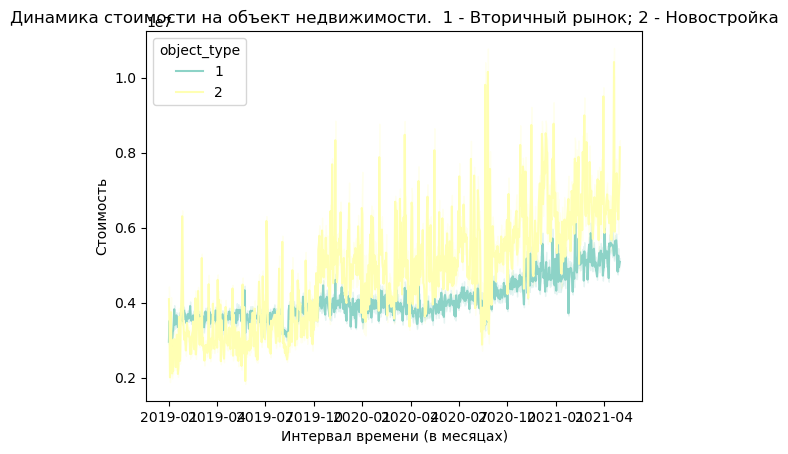

In [98]:
sns.lineplot(data=df, x='date', y='price',hue='object_type',palette='Set3').set(title='Динамика стоимости на объект недвижимости.  1 - Вторичный рынок; 2 - Новостройка',
                                                                 xlabel='Интервал времени (в месяцах)', 
                                                                 ylabel='Стоимость'
                                                                 )

Как видно, с течением времени стоимость квартир в новостройках стала выше, чем на вторичном рынке. Также, стоимость в новостройках была подвержена большим колебаниям (возможно, из-за программы льготной ипотеки, поправкам в законодательстве по регулированию рынка строительных компаний, уход с рынка многих иностранных производителей (из-за чего стоимость на материалы и комплектующие возросла))

Решила вывести таблички, в которых отражена средняя стоимость за (м2) по годам, а также прирост цен и стандартное отклонение по стоимости.

In [99]:
m_list = []
m2_list = []
for y in [2019, 2020, 2021]:
    m = round(df[(df['year'] == y)&(df['object_type'] == 1)]['price'].mean(), 2)
    m2 = round(df[(df['year'] == y)&(df['object_type'] == 2)]['price'].mean(), 2)
    m_list.append(m)
    m2_list.append(m2)
m_change = [0]
m2_change = [0]
for y in [2019, 2020, 2021]:
    m = round(df[(df['year'] == y + 1)&(df['object_type'] == 1)]['price'].mean(), 2)/round(df[(df['year'] == y)&(df['object_type'] == 1)]['price'].mean(), 2)
    m2 = round(df[(df['year'] == y+1)&(df['object_type'] == 2)]['price'].mean(), 2)/round(df[(df['year'] == y)&(df['object_type'] == 2)]['price'].mean(), 2)
    m_change.append(m)
    m2_change.append(m2)
m_change.pop(-1)
m2_change.pop(-1)
m_spread = []
m2_spread = []
for y in [2019, 2020, 2021]:
    m = np.std(df[(df['year'] == y)&(df['object_type'] == 1)]['price'])
    m2 = np.std(df[(df['year'] == y)&(df['object_type'] == 2)]['price'])
    m_spread.append(m)
    m2_spread.append(m2)
print(m_list, m2_list, m_change, m2_change, m_spread, m2_spread)

[3664159.62, 4114872.93, 5040430.89] [3560067.28, 5493335.32, 6770634.89] [0, 1.1230059158831078, 1.2249299008122712] [0, 1.543042557330546, 1.2325180415165333] [3380441.89710184, 3751529.075019425, 4491630.256667003] [3614296.282883482, 4799793.202632343, 5506910.06454153]


In [100]:
df_now = pd.DataFrame({'name': ['Квартиры на вторичном рынке (м2)','Квартиры в новостройке (м2)'],
  'price_2019' : [m_list[0],m2_list[0]],
   'change_2019': [m_change[0],m2_change[0]],
   'spread_2019': [m_spread[0],m2_spread[0]]})
df_now


name  price_2019  change_2019   spread_2019
0  Квартиры на вторичном рынке (м2)  3664159.62            0  3.380442e+06
1       Квартиры в новостройке (м2)  3560067.28            0  3.614296e+06

In [101]:
df_now = pd.DataFrame({'name': ['Квартиры на вторичном рынке (м2)','Квартиры в новостройке (м2)'],
  'price_2020' : [m_list[1],m2_list[1]],
   'change_2020': [m_change[1],m2_change[1]],
   'spread_2020': [m_spread[1],m2_spread[1]]})
df_now



name  price_2020  change_2020   spread_2020
0  Квартиры на вторичном рынке (м2)  4114872.93     1.123006  3.751529e+06
1       Квартиры в новостройке (м2)  5493335.32     1.543043  4.799793e+06

In [102]:
df_now = pd.DataFrame({'name': ['Квартиры на вторичном рынке (м2)','Квартиры в новостройке (м2)'],
  'price_2021' : [m_list[2],m2_list[2]],
   'change_2021': [m_change[2],m2_change[2]],
   'spread_2021': [m_spread[2],m2_spread[2]]})
df_now


name  price_2021  change_2021   spread_2021
0  Квартиры на вторичном рынке (м2)  5040430.89     1.224930  4.491630e+06
1       Квартиры в новостройке (м2)  6770634.89     1.232518  5.506910e+06

Как видно, ежегодный темп роста на рынке новостроек - больше. Стандартное отклонение стоимости также с течением времени возросло.

ЧИСЛО КОМНАТ

[Text(0.5, 1.0, 'Зависимость стоимости на объект недвижимости от числа комнат'),
 Text(0.5, 0, 'Число комнат'),
 Text(0, 0.5, 'Стоимость')]

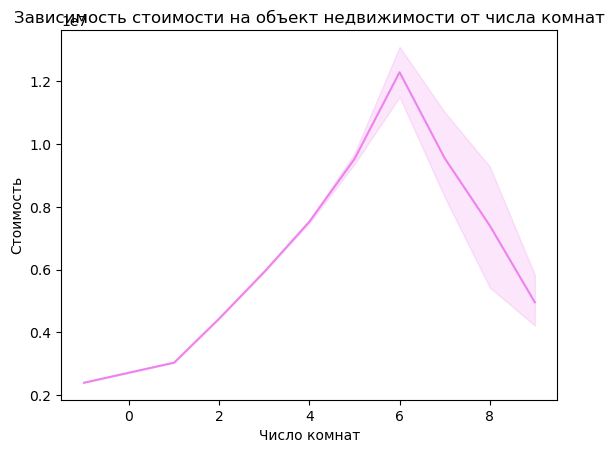

In [104]:
sns.lineplot(data=df,x='rooms',y='price', color = 'violet').set(title='Зависимость стоимости на объект недвижимости от числа комнат',
                                                                 xlabel='Число комнат', 
                                                                 ylabel='Стоимость'
                                                                 )

Как видно, средняя стоимость на объект недвижимости растет до тех пор, пока число комнат не превысит 6. Что можно объяснить тем, что большое количество комнат обычно в жилых домах.

In [105]:
df[df['rooms'] > 6].groupby(['building_type','levels']).count().sort_values('price', axis=0, ascending=False)[['price']].head(10) 
#Кирпичный дом

price
building_type levels       
3             5          45
              9          31
1             9          29
3             6          13
              3          12
              7          11
              4          10
              10          9
              2           8
              1           6

Как видно, гипотеза не подтвердилась. В топе первое место занимают 5-ти и 9-ти этажные дома кирпичного типа. Рассмотрим отдельно.

In [106]:
df[(df['rooms'] > 6)&(df['building_type'] == 3)&(df['levels'] == 5)]

index     price       date region  building_type  level  levels  \
184626   1783610   2900000 2019-09-29   2843              3      4       5   
418227   3992278   3500000 2020-12-16   2843              3      5       5   
469780      7005  16443000 2019-01-02   2661              3      5       5   
477701    160987   8750000 2019-01-29   2661              3      2       5   
493500    467322  15750000 2019-03-11   2661              3      2       5   
503611    654624  12400000 2019-04-02   2661              3      1       5   
528254   1083625  11500000 2019-06-07   2661              3      1       5   
528861   1097821  22200000 2019-06-10   2661              3      1       5   
529081   1101148   3390000 2019-06-11   2661              3      3       5   
544940   1375940  16100000 2019-07-22   2661              3      1       5   
587802   1913432  10000000 2019-10-25   2661              3      2       5   
603971   2081360  13000000 2019-11-28   2661              3      5       5   
619996   2271567  19580000 2020-01-17   2661              3      2       5   
632926   2414014  12300000 2020-02-14   2661              3      5       5   
647810   2579079  15000000 2020-03-14   2661              3      1       5   
678608   2892874  17659000 2020-05-21   2661              3      4       5   
679436   2899704  14990000 2020-05-23   2661              3      3       5   
703470   3152049  11000000 2020-07-03   2661              3      5       5   
711312   3220429  20000000 2020-07-15   2661              3      2       5   
711976   3226944   2250000 2020-07-16   2661              3      2       5   
715419   3262098  27000000 2020-07-22   2661              3      5       5   
753055   3677358   9950000 2020-10-13   2661              3      4       5   
756778   3710287  11250000 2020-10-19   2661              3      5       5   
764365   3792143   5200000 2020-11-03   2661              3      2       5   
765427   3801055  13990000 2020-11-05   2661              3      5       5   
776833   3932602  15200000 2020-12-04   2661              3      5       5   
807516   4303594  12600000 2021-03-18   2661              3      4       5   
816755   4407786  18500000 2021-04-04   2661              3      2       5   
838860    312397   1950000 2019-02-19   2722              3      1       5   
844647    795105   1800000 2019-04-23   2722              3      5       5   
1343566   563081   5000000 2019-03-24   6171              3      5       5   
1753773  3327999  15500000 2020-08-01      3              3      5       5   
1771615  3559497  17950000 2020-09-22      3              3      1       5   
1883880   204187   2400000 2019-02-04   4007              3      3       5   
2020985   245677   4050000 2019-02-10   2922              3      3       5   
2038291   727550   6499999 2019-04-12   2922              3      4       5   
2255364  4492026   3870000 2021-04-20   2900              3      3       5   
3488361  3910077    930000 2020-11-30   3230              3      1       5   
3932265   453324   1400000 2019-03-07  11991              3      1       5   
3958474  2515693   5000000 2020-03-02   1010              3      1       5   
3964577  3156044   4300000 2020-07-04   1010              3      1       5   
3966582  3328890   5100000 2020-08-01   1010              3      1       5   
4131044  3093660   1800000 2020-06-27   2885              3      5       5   
4131489  3539891   1800000 2020-09-19   2885              3      5       5   
4131680  3785786   1300000 2020-11-01   2885              3      5       5   

         rooms   area  kitchen_area  object_type  \
184626       9   60.0           9.0            1   
418227       9   83.0          10.0            1   
469780       9  144.0          30.0            1   
477701       7  106.0          18.0            1   
493500       9   64.0           8.0            1   
503611       7  100.0           9.0            1   
528254       7   99.0           3.7            1   
528861

In [107]:
df[(df['rooms'] > 6)&(df['building_type'] == 3)&(df['levels'] == 9)]

index     price       date region  building_type  level  levels  \
141244   1378828   7500000 2019-07-22   2843              3      9       9   
445760   4271646   4700000 2021-03-13   2843              3      5       9   
510409    775801   4200000 2019-04-20   2661              3      7       9   
541099   1316671   7900000 2019-07-11   2661              3      5       9   
809766   4335928   7890000 2021-03-22   2661              3      6       9   
866533   2513143   2440000 2020-03-02   2722              3      2       9   
898015   3981941   4300000 2020-12-14   2722              3      8       9   
901897   4188186   1680000 2021-02-22   2722              3      3       9   
934019    271445   3550000 2019-02-13     81              3      9       9   
1472491  3854114   4700000 2020-11-18   6171              3      1       9   
1492789  4409308   2600000 2021-04-05   6171              3      9       9   
1812295  3937837  15000000 2020-12-05      3              3      1       9   
1905153  3465633   4700000 2020-09-04   4007              3      2       9   
1922536   751772   3017105 2019-04-16   2604              3      4       9   
2169401  3522092   1390000 2020-09-15   2922              3      5       9   
2186821  3884292   1670000 2020-11-25   2922              3      1       9   
2186908  3886008   3000000 2020-11-25   2922              3      9       9   
2985502  4207439   2500000 2021-02-27   9654              3      6       9   
3034649   386252   2250000 2019-02-28   2871              3      9       9   
3049357  1864650   2250000 2019-10-12   2871              3      9       9   
3258464  4534866   4200000 2021-04-26   3019              3      1       9   
3485727  3846615   2000000 2020-11-16   3230              3      7       9   
3521510   352902   4600000 2019-02-25   4417              3      7       9   
3525614  1098608   5500000 2019-06-10   4417              3      3       9   
3527103  1391613   2000000 2019-07-24   4417              3      7       9   
3554712  1753228   2099999 2019-09-24   2072              3      9       9   
3563095  2301824   1700000 2020-01-23   2072              3      9       9   
3895739  2124982   2604000 2019-12-06   5368              3      1       9   
3972633  3932827   1900000 2020-12-04   1010              3      2       9   
4005139  4593008   3260000 2021-04-30   7793              3      4       9   
4255827  3978337   3100000 2020-12-13   7896              3      4       9   

         rooms   area  kitchen_area  object_type                 reg_name  \
141244       7  150.0          30.0            1       Краснодарский край   
445760       9   55.0          10.1            1       Краснодарский край   
510409       7   60.0          13.0            2          Санкт-Петербург   
541099       7  130.0          23.0            1          Санкт-Петербург   
809766       9   75.0          23.0            1          Санкт-Петербург   
866533       9   52.0           9.5            1  Республика Башкортостан   
898015       9   82.0          12.0            1  Республика Башкортостан   
901897       9   47.0          12.0            1  Республика Башкортостан   
934019       9   49.0           8.0            1       Московская область   
1472491      7   77.2          49.6            1     Свердловская область   
1492789      9   36.0           7.6            1     Свердловская область   
1812295      9   80.0          11.5            1                   Москва   
1905153      9  110.6          20.0            2      Республика Дагестан   
1922536      9   66.3          14.0            2      Ярославская область   
2169401      8   90.0          15.0            1     Республика Татарстан   
2186821      9   33.3           6.0            1     Республика Татарстан   
2186908      9   50.0           9.0            1     Республика Татарстан   
2985502      9   37.0           9.0            1    Новосибирская область   
3034649      9   48.0           9.0            1   

In [108]:
df[(df['rooms'] >6)&(df['levels'] < 3)]['price'].count() / df[df['levels'] < 3]['price'].count()

0.0001945835028568396

Процент жилых домов в данной категории очень мал.

Определенно ошибка в данных. Квартира площадью меньше 6 м2, то есть при числе комнат 9 штук, площадь минимальная 63 м2. Да и явно в жилом доме не может быть квартира с 9 комнатами, если только это не коммуналка и объявление предполагает продажу только одной комнаты из этих 9-ти.

[Text(0.5, 1.0, 'Динамика стоимости на объект недвижимости по числу комнат'),
 Text(0.5, 0, 'Интервал времени (в месяцах)'),
 Text(0, 0.5, 'Стоимость квартиры')]

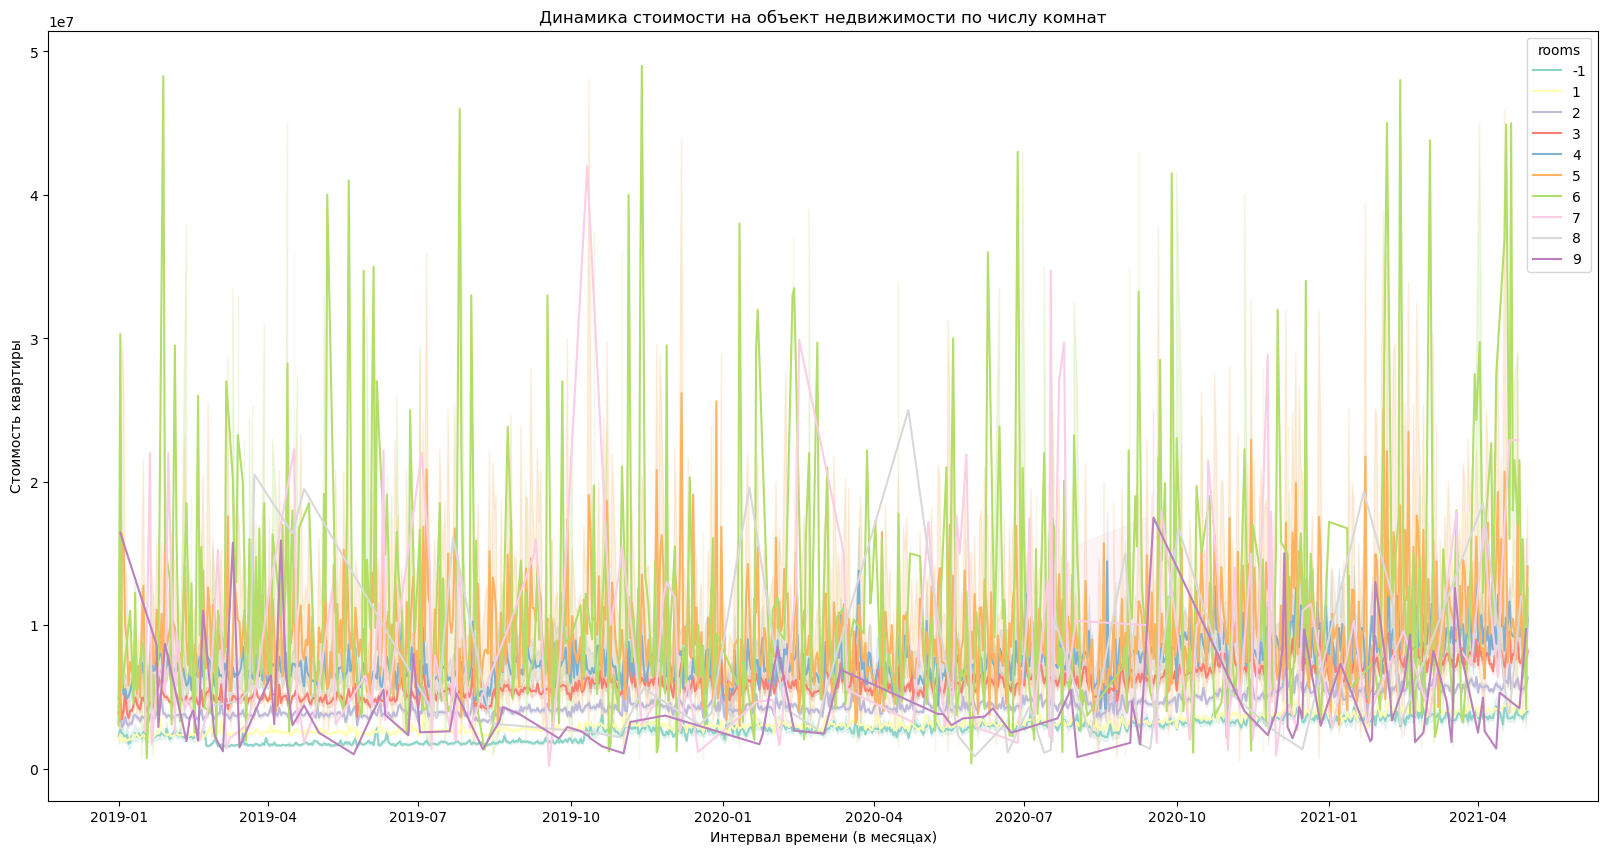

In [109]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='date', y='price',hue='rooms',palette='Set3').set(title='Динамика стоимости на объект недвижимости по числу комнат',
                                                                 xlabel='Интервал времени (в месяцах)', 
                                                                 ylabel='Стоимость квартиры'
                                                                 )

Как видно, динамика на квартиры с 6, 7, 8, 9 комнатами гораздо более нестабильная. Что опять же подтверждает, что в данных какие-то ошибки.

ЧИСЛО ЭТАЖЕЙ. ТИП ДОМА (МНОГОКВАРТИРНЫЙ ИЛИ ЧАСТНЫЙ)

In [110]:
print(df[df['levels'] <= 2]['m2'].mean())

37094.87294205843


In [111]:
print(df[df['levels'] >= 9]['m2'].mean())

86118.96476315694


Как видно, в среденем стоимость одного квадратного метра в жилом доме ниже, чем в многоэтажке. Это говорит о том, что недвижимость в центре города по своей стоимости выше, чем в пригороде. Делаем допущение о том, что в центре нет жилых домов. 
Опять же, есть многоквартирные дома с 2 этажами, но упустим этот момент.

[Text(0.5, 1.0, 'Зависимость стоимости на объект недвижимости от этажа'),
 Text(0.5, 0, 'Этаж'),
 Text(0, 0.5, 'Стоимость')]

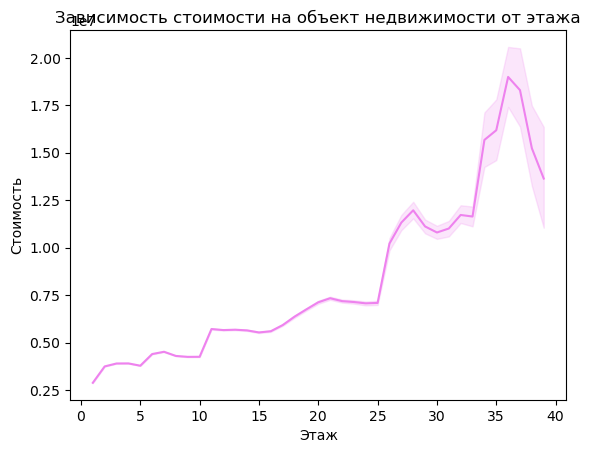

In [112]:
sns.lineplot(data=df,x='level',y='price', color = 'violet').set(title='Зависимость стоимости на объект недвижимости от этажа',
                                                                 xlabel='Этаж', 
                                                                 ylabel='Стоимость'
                                                                 )

В целом, чем выше этаж, тем выше стоимость. Это логично, так как чем выше дом - тем скорее всего он относится к новостройке, а также тем дороже в нем стоимость квартир.

Разобьем дома на несколько типов - 5-этажные (хрущевки - до 3-х комнат), 9-этажные (до 3-х комнат), многоэтажки (до 16 этажей, до 4-х комнат), более 16 этажей - новостройки, много студий.

[Text(0.5, 1.0, 'Зависимость стоимости на объект недвижимости от этажа'),
 Text(0.5, 0, 'Этаж'),
 Text(0, 0.5, 'Стоимость')]

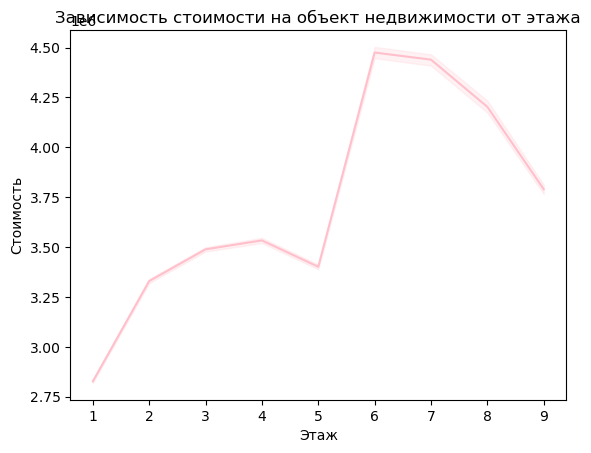

In [113]:
sns.lineplot(data=df[df['levels'] <= 9],x='level',y='price', color = 'pink').set(title='Зависимость стоимости на объект недвижимости от этажа',
                                                                 xlabel='Этаж', 
                                                                 ylabel='Стоимость'
                                                                 )

[Text(0.5, 1.0, 'Зависимость стоимости на объект недвижимости от этажа'),
 Text(0.5, 0, 'Этаж'),
 Text(0, 0.5, 'Стоимость')]

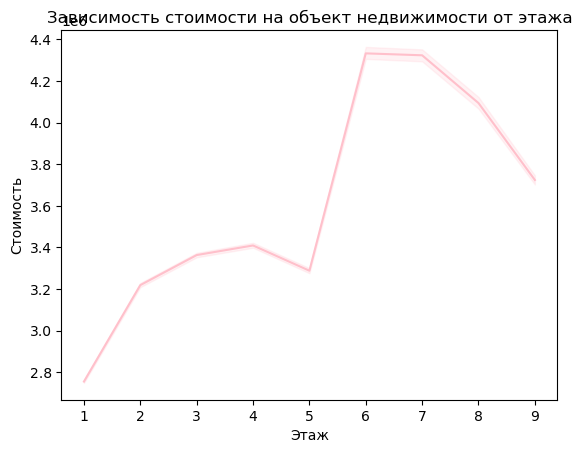

In [114]:
sns.lineplot(data=df[(df['levels'] <= 9)&(df['rooms'] <= 3)],x='level',y='price', color = 'pink').set(title='Зависимость стоимости на объект недвижимости от этажа',
                                                                 xlabel='Этаж', 
                                                                 ylabel='Стоимость'
                                                                 )

Динамика - аналогичная. В целом на нижних и высоких этажах квартиры дешевле. В 9-этажках, например. Ну а если рассматривать 5-этажные дома, то, действительно, квартиры на 5-м этаже пользуются меньшим спросом.


[Text(0.5, 1.0, 'Зависимость стоимости на объект недвижимости от этажа'),
 Text(0.5, 0, 'Этаж'),
 Text(0, 0.5, 'Стоимость')]

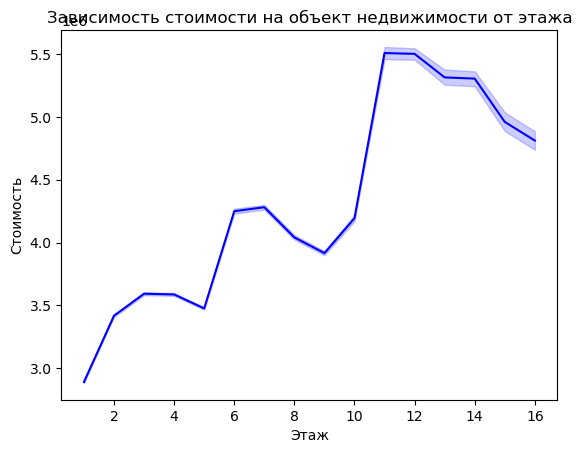

In [115]:
sns.lineplot(data=df[(df['levels'] <= 16)&(df['object_type'] == 1)],x='level',y='price', color = 'blue').set(title='Зависимость стоимости на объект недвижимости от этажа',
                                                                 xlabel='Этаж', 
                                                                 ylabel='Стоимость'
                                                                 )

Как видно, динамика схожа. На верхнем этаже цена за квартиру меньше. Но при этом наблюдается устойчивый рост стоимости квартир с повышением этажа. Опять же, предполагаю, что это из-за того, что качество жилых условий в более высотных домах - выше, плюс, скорее всего это новостройки.

[Text(0.5, 1.0, 'Зависимость стоимости на объект недвижимости от этажа'),
 Text(0.5, 0, 'Этаж'),
 Text(0, 0.5, 'Стоимость')]

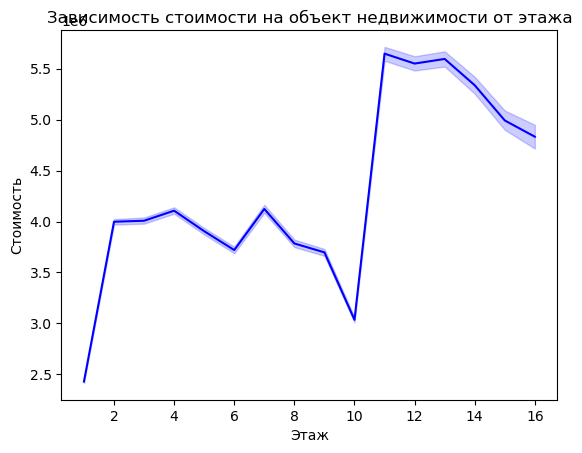

In [116]:
sns.lineplot(data=df[(df['levels'] <= 16)&(df['object_type'] == 2)],x='level',y='price', color = 'blue').set(title='Зависимость стоимости на объект недвижимости от этажа',
                                                                 xlabel='Этаж', 
                                                                 ylabel='Стоимость'
                                                                 )

Как видно, динамика на рынке первичного жилья схожа с общей. Сильный провал в районе 11 этажа.

[Text(0.5, 1.0, 'Зависимость стоимости на объект недвижимости от этажа'),
 Text(0.5, 0, 'Этаж'),
 Text(0, 0.5, 'Стоимость')]

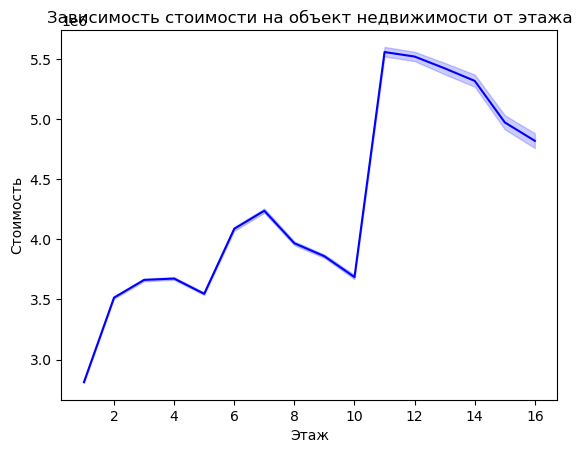

In [117]:
sns.lineplot(data=df[df['levels'] <= 16],x='level',y='price', color = 'blue').set(title='Зависимость стоимости на объект недвижимости от этажа',
                                                                 xlabel='Этаж', 
                                                                 ylabel='Стоимость'
                                                                 )

Как видно, динамика слегка разнится, именно на 5, 9 и 16 этажах. Если предполагать, что на первичном рынке практически нет домов 5 и 9 этажей, всполне логично.

Поставим гипотезу:
    
H0: стоимость жилья на первом и 5(9,16) этажах не отличается от стоимости жилья на этажах между ними.
    
H1: стоимость жилья на первом и 5(9,16) этажах отличается от стоимости жилья на этажах между ними.


In [118]:
sample_1 = df[(df['levels'] <=5)&(df['level'] ==1)]['price'].tolist()
sample_2 = df[(df['levels'] <=5)&(df['level'] ==5)]['price'].tolist()
sample_3 = df[(df['levels'] <=5)&(df['level'] !=1)&(df['level'] !=5)]['price'].tolist()

In [119]:
np.mean(sample_1)

2551920.284953725

In [120]:
np.mean(sample_2)

2805416.5502999984

In [121]:
np.mean(sample_3)

2962090.929894632

In [122]:
alpha = 0.05 # уровень статистической значимости
         
# проводим тест Уилкоксона-Манна-Уитни для сравнения двух независимых выборок
results = st.mannwhitneyu(sample_1, sample_3)

print('p-value:', results.pvalue)

# формулируем результаты
if results.pvalue < alpha:
    print('Отклоняем нулевуюю гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 0.0
Отклоняем нулевуюю гипотезу


In [123]:
alpha = 0.05 # уровень статистической значимости
         
# проводим тест Уилкоксона-Манна-Уитни для сравнения двух независимых выборок
results = st.mannwhitneyu(sample_2, sample_3)

print('p-value:', results.pvalue)

# формулируем результаты
if results.pvalue < alpha:
    print('Отклоняем нулевуюю гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 3.2417172182420966e-45
Отклоняем нулевуюю гипотезу


Как видно, действительно, стоимость жилья на 1 и 5 этаже в 5-этажных домах ниже, чем на этажах от 2 до 4.

In [125]:
sample_1 = df[(df['levels'] == 9)&(df['level'] ==1)]['price'].tolist()
sample_2 = df[(df['levels'] == 9)&(df['level'] ==9)]['price'].tolist()
sample_3 = df[(df['levels'] == 9)&(df['level'] !=1)&(df['level'] !=9)]['price'].tolist()

In [126]:
np.mean(sample_1)

3466196.6892535

In [127]:
np.mean(sample_2)

3789653.431856361

In [128]:
np.mean(sample_3)

3937324.9943563286

In [129]:
alpha = 0.05 # уровень статистической значимости
         
# проводим тест Уилкоксона-Манна-Уитни для сравнения двух независимых выборок
results = st.mannwhitneyu(sample_1, sample_3)

print('p-value:', results.pvalue)

# формулируем результаты
if results.pvalue < alpha:
    print('Отклоняем нулевуюю гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 2.2688532247046745e-263
Отклоняем нулевуюю гипотезу


In [130]:
alpha = 0.05 # уровень статистической значимости
         
# проводим тест Уилкоксона-Манна-Уитни для сравнения двух независимых выборок
results = st.mannwhitneyu(sample_2, sample_3)

print('p-value:', results.pvalue)

# формулируем результаты
if results.pvalue < alpha:
    print('Отклоняем нулевуюю гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 2.2528618378080055e-42
Отклоняем нулевуюю гипотезу


Очевидно, результат будет такой же. Стоимость на верхнем и нижнем этажах - ниже.

ТИП СТРОЕНИЯ/ building_type - Тип дома 0 - Другое. 1 - Панельный. 2 - Кирпично-монолитный. 3 - Кирпичный. 4 - Блочный 5 - Деревянный.

Один из важных факторов, влияющих на спрос и предложение на рынке недвижимости, это типы домов и их характеристики. Разные типы домов имеют разные преимущества и недостатки, которые влияют на их цену, качество, комфорт, функциональность и эстетику.

In [131]:
print(df[df['building_type'] == 1]['price'].mean()) #Панельный дом
print(df[df['building_type'] == 1]['m2'].mean())

3284624.891607747
66757.15236575561


In [132]:
print(df[df['building_type'] == 2]['price'].mean()) #Кирпично-монолитный дом
print(df[df['building_type'] == 2]['m2'].mean())

6420979.801256672
114862.9026435054


In [133]:
print(df[df['building_type'] == 3]['price'].mean()) #Кирпичный дом
print(df[df['building_type'] == 3]['m2'].mean())

3820716.1810515695
71155.89658400278


In [134]:
print(df[df['building_type'] == 4]['price'].mean()) #Блочный дом
print(df[df['building_type'] == 4]['m2'].mean())

3487343.1442199275
71413.64369521086


In [135]:
print(df[df['building_type'] == 5]['price'].mean()) #Деревянный дом
print(df[df['building_type'] == 5]['m2'].mean())

1535110.9387262785
32715.423255187732


Как видно, наиболее дорогие по стоимости объекты недвижимости находятся в кирпично-монолитных домах, наиболее дешевые - деревянных.


[Text(0.5, 1.0, 'Динамика стоимости на объект недвижимости по типу дома'),
 Text(0.5, 0, 'Интервал времени (в месяцах)'),
 Text(0, 0.5, 'Стоимость одного квадратного метра')]

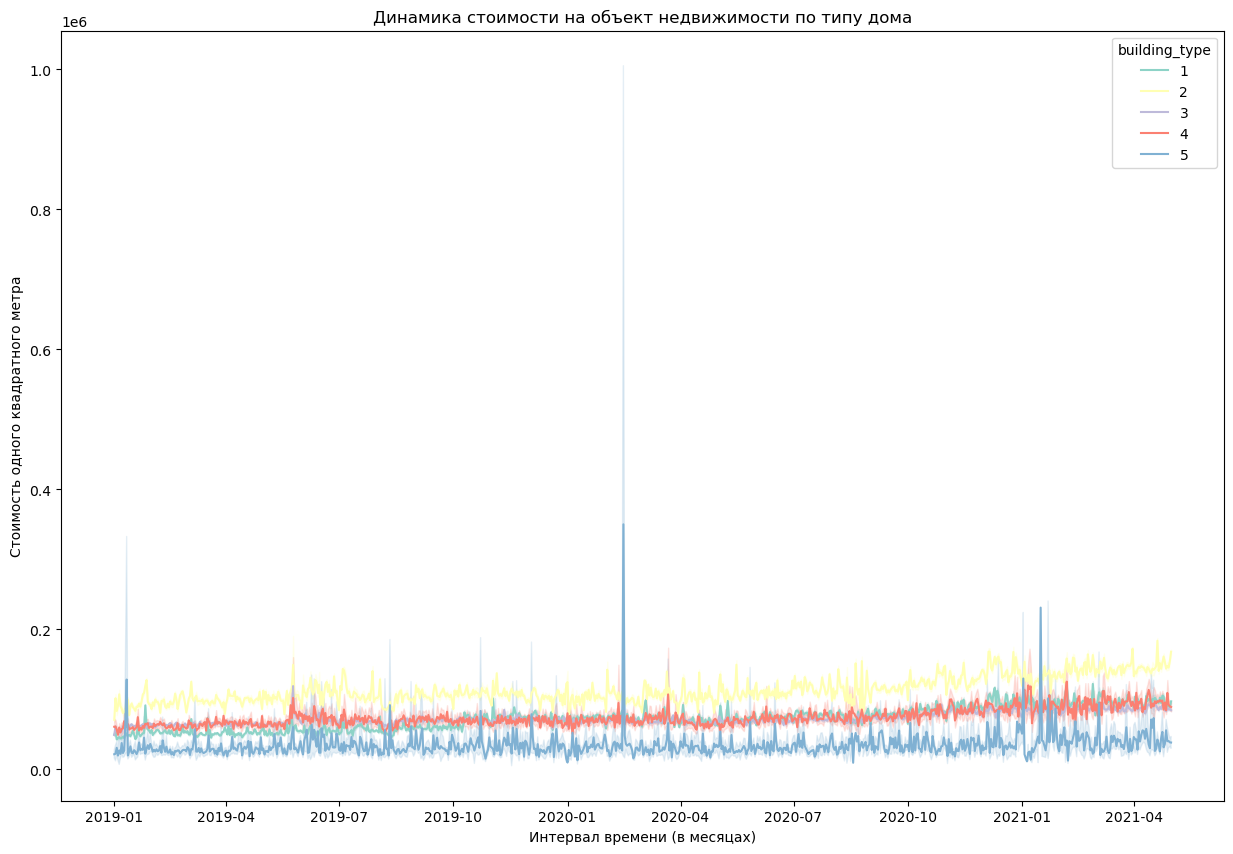

In [142]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df, x='date', y='m2',hue='building_type',palette='Set3').set(title='Динамика стоимости на объект недвижимости по типу дома',
                                                                 xlabel='Интервал времени (в месяцах)', 
                                                                 ylabel='Стоимость одного квадратного метра'
                                                                 )


Проверим, сколько этажей чаще всего в домах разного типа.

In [136]:
type_buy = df.pivot_table(index=['building_type','levels'],
                        aggfunc='count', 
                        values='index')
type_buy = type_buy.sort_values(by ='index', ascending=False)
type_buy.reset_index(inplace=True)
type_buy.columns=['building_type','levels','count']
type_buy 

building_type  levels   count
0                1      10  554879
1                3       5  442763
2                1       5  330776
3                1       9  323704
4                3       9  218495
..             ...     ...     ...
180              4      35       3
181              5      28       3
182              5      29       2
183              5      30       1
184              5      32       1

[185 rows x 3 columns]

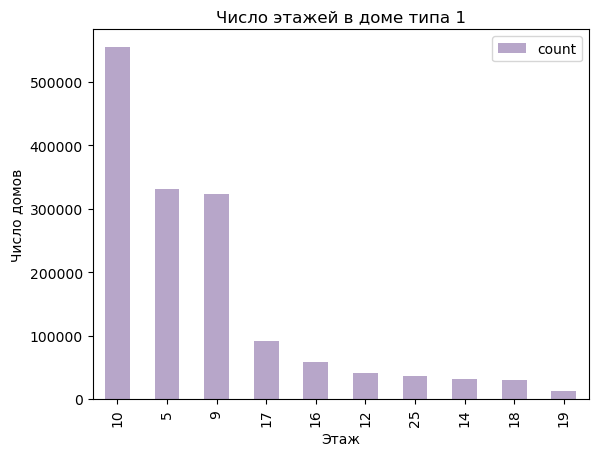

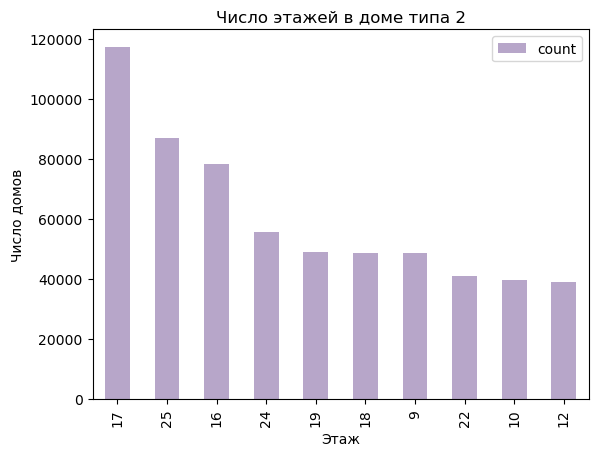

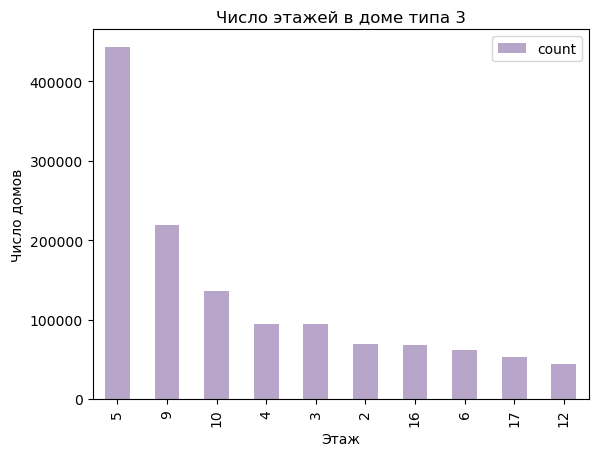

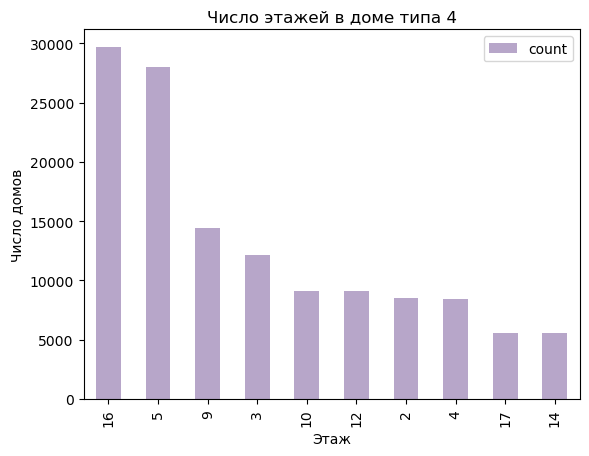

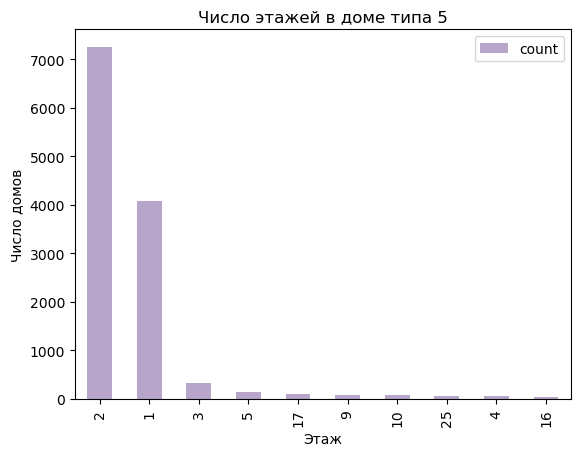

In [144]:
list_building_type = [1, 2, 3, 4, 5]
for i in list_building_type:
    type_buy[type_buy['building_type'] == i].head(10).plot(kind='bar', x='levels', y='count', title=f'Число этажей в доме типа {i}', xlabel='Этаж',ylabel='Число домов',color=(0.6, 0.5, 0.7, 0.7))

ВЫВОДЫ:

1. Панельные дома - 10, 5, 9 этажей. Логично. Так как это дома построенные по большей части в советское время, их стоимость средняя, большая часть - вторичный рынок. 

2. Кирпично- монолитные дома - 17, 25, 16 этажей. Стоимость самая высокая, по числу этажей можно сделать вывод, что это новостройки как раз в целых спальных районах.

3. Кирпичные дома - 5, 9, 10 этажей. 

4. Блочные дома - 16, 5, 9 этажей. Классическое число этажей для домов в спальных районах по невысокой стоимости квартир.

5. Деревянные дома - чаще всего жилые, поэтому 2, 1, 3 этажей. Самая низкая стоимость, что очевидно, так как дом жилой.

РЕГИОНЫ

In [145]:
region_buy = df.groupby('reg_name')['price'].count().reset_index()
region_buy['%'] = region_buy['price'] / region_buy['price'].sum() * 100
region_buy

reg_name   price         %
0                    Алтайский край   59331  1.378399
1                  Амурская область    2053  0.047696
2             Архангельская область    3446  0.080059
3              Астраханская область    1476  0.034291
4              Белгородская область   46792  1.087088
..                              ...     ...       ...
77              Челябинская область  128409  2.983243
78             Чеченская Республика    2319  0.053876
79             Чувашская Республика   48395  1.124330
80  Ямало-Ненецкий автономный округ     196  0.004554
81              Ярославская область   82256  1.911001

[82 rows x 3 columns]

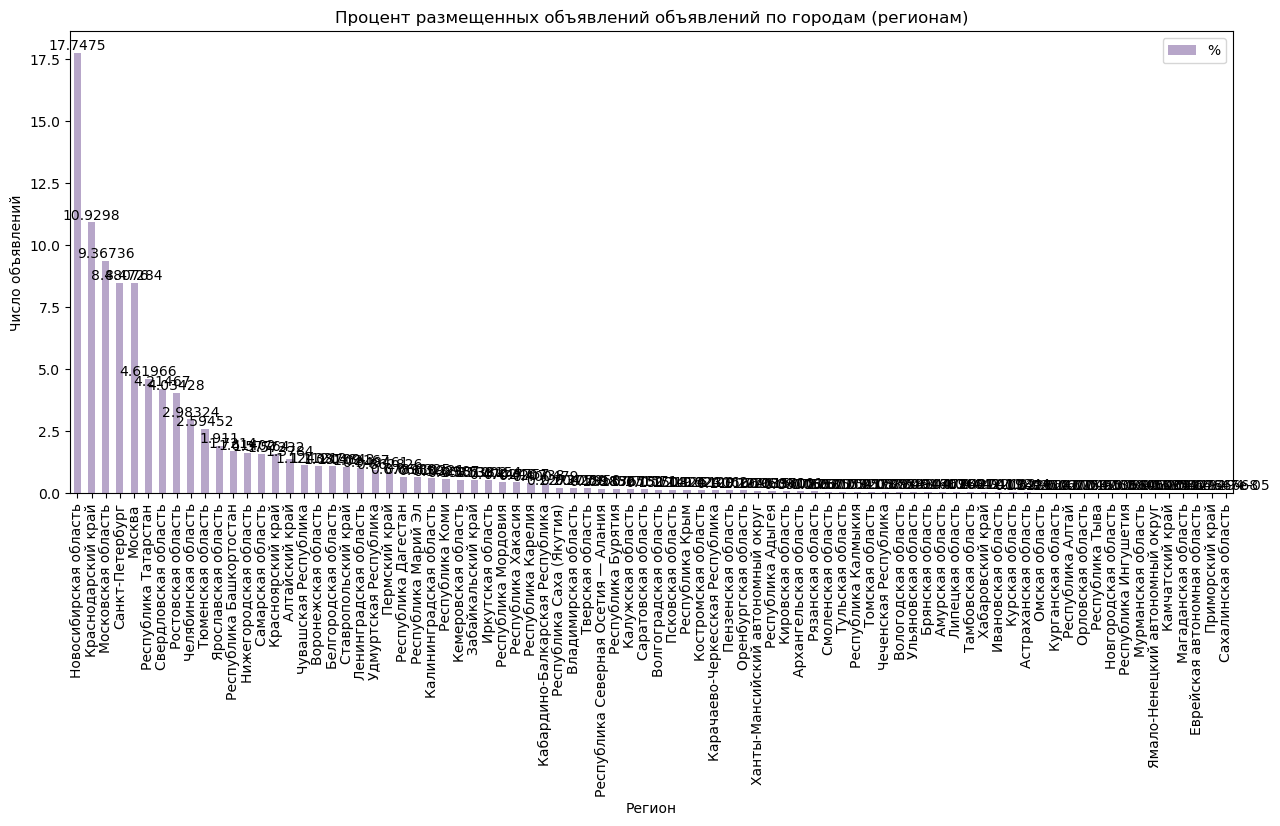

In [146]:
ax = region_buy.sort_values('price', axis=0, ascending=False).plot(kind ='bar', x='reg_name', y = '%',title=f'Процент размещенных объявлений объявлений по городам (регионам)', figsize=(15, 6), color=(0.6, 0.5, 0.7, 0.7),xlabel='Регион',ylabel='Число объявлений')
ax.bar_label(ax.containers[0])
plt.show()

Как видно, наиболее активный рынок недвижимости в Новосибиркой области, Краснодарском крае и Московской области + Москва и СПб. 

Построим динамику роста цен для каждого региона из топ 10 по числу объявлений.

In [147]:
region_buy = region_buy.sort_values('price', axis=0, ascending=False).head(10)
region_buy['reg_name'].tolist()
df_new_city = pd.DataFrame()
for i in region_buy['reg_name'].tolist():
    df2 = df[df['reg_name'] == i]
    df_new_city = df_new_city.append(df2, ignore_index = True )
df_new_city 

C:\Users\Админ\AppData\Local\Temp\ipykernel_5264\3839800654.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new_city = df_new_city.append(df2, ignore_index = True )


index    price       date region  building_type  level  levels  \
0            148  1100000 2019-01-01   9654              1      8      10   
1            155  1660000 2019-01-01   9654              1      8      10   
2            158  1550000 2019-01-01   9654              1     15      18   
3            162  1700000 2019-01-01   9654              1     10      10   
4            165  1650000 2019-01-01   9654              1     10      10   
...          ...      ...        ...    ...            ...    ...     ...   
3161301  4605254  3070000 2021-05-01   3991              3      3       9   
3161302  4605255  3600000 2021-05-01   3991              3      4      16   
3161303  4605256  3500000 2021-05-01   3991              3      7      10   
3161304  4605257  4300000 2021-05-01   3991              3      5      14   
3161305  4605310  4100000 2021-05-01   3991              2      6      16   

         rooms   area  kitchen_area  object_type               reg_name  year  \
0            1  39.02           9.3            2  Новосибирская область  2019   
1            3  59.02           1.0            2  Новосибирская область  2019   
2            2  56.00           7.0            2  Новосибирская область  2019   
3            2  58.00           8.0            2  Новосибирская область  2019   
4            1  48.00          14.0            1  Новосибирская область  2019   
...        ...    ...           ...          ...                    ...   ...   
3161301      1  44.30           9.0            1      Тюменская область  2021   
3161302      1  40.00          13.0            2      Тюменская область  2021   
3161303      1  50.00          11.0            1      Тюменская область  2021   
3161304      1  48.70          10.0            1      Тюменская область  2021   
3161305      3  78.00           9.0            1      Тюменская область  2021   

         month y_month            m2  
0            1  2019.1  28190.671451  
1            1  2019.1  28126.058963  
2            1  2019.1  27678.571429  
3            1  2019.1  29310.344828  
4            1  2019.1  34375.000000  
...        ...     ...           ...  
3161301      5  2021.5  69300.225734  
3161302      5  2021.5  90000.000000  
3161303      5  2021.5  70000.000000  
3161304      5  2021.5  88295.687885  
3161305      5  2021.5  52564.102564  

[3161306 rows x 16 columns]

[Text(0.5, 1.0, 'Динамика стоимости на объект недвижимости'),
 Text(0.5, 0, 'Интервал времени (в месяцах)'),
 Text(0, 0.5, 'Стоимость объекта недвижимости')]

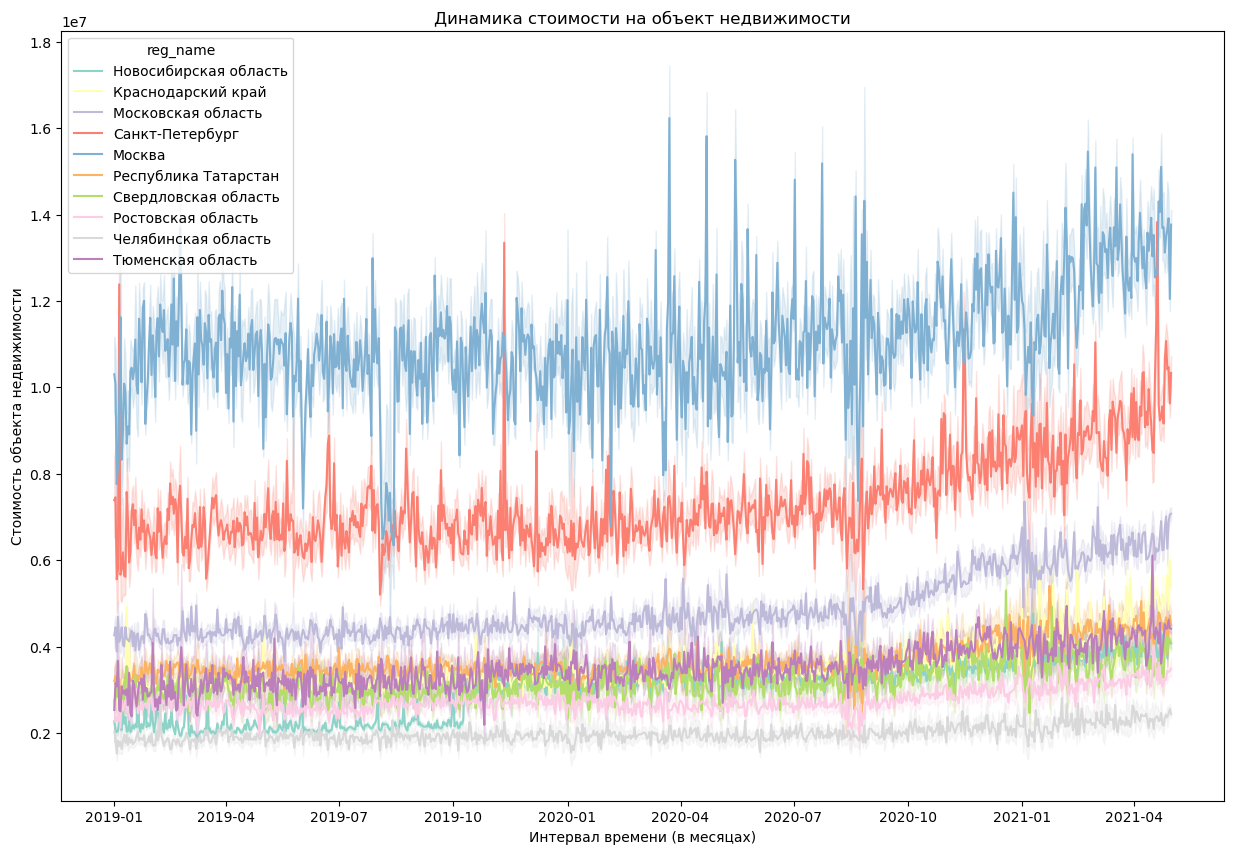

In [148]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_new_city , x='date', y='price',hue='reg_name',palette='Set3').set(title='Динамика стоимости на объект недвижимости',
                                                                 xlabel='Интервал времени (в месяцах)', 
                                                                 ylabel='Стоимость объекта недвижимости'
                                                                 )


Как видно, динамика схожа - наблюдается рост стоимости. В Питере и Москве динамика более нестабильная, что объясняется, возможно, характером объявлений (то есть разбросом цен на недвжимость в разных районах)

## 5. Когда выгодно покупать/продавать объект недвижимости?

In [150]:
month = df['y_month'].unique().tolist()
df['season'] = df['date'].dt.quarter #1-зима, 2-весна, 3-лето, 4-осень
season = df['season'].unique().tolist()
season

C:\Users\Админ\AppData\Local\Temp\ipykernel_5264\293189107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['date'].dt.quarter #1-зима, 2-весна, 3-лето, 4-осень


[1, 2, 3, 4]

Для начала изучим динамику по месяцам, затем по сезонам.

In [151]:
df_price = pd.DataFrame({'date': [],
  'count' : [],
'type_1': [],
   'type_2': []})
df_price
df_m2 = pd.DataFrame({'date': [],
  'm2_count' : [],
   'type_1': [],
   'type_2': []})
df_m2


Empty DataFrame
Columns: [date, m2_count, type_1, type_2]
Index: []

In [152]:
for y in month:
    c = round(df[df['y_month'] == y]['price'].count(), 2)
    m = round(df[(df['y_month'] == y)&(df['object_type'] == 1)]['price'].mean(), 2)
    m2 = round(df[(df['y_month'] == y)&(df['object_type'] == 2)]['price'].mean(), 2)
    df_price.loc[len(df_price.index)] = [y,c,m,m2]
for y in season:
    c = round(df[df['season'] == y]['m2'].count(), 2)
    m = round(df[(df['season'] == y)&(df['object_type'] == 1)]['m2'].mean(), 2)
    m2 = round(df[(df['season'] == y)&(df['object_type'] == 2)]['m2'].mean(), 2)
    df_m2.loc[len(df_m2.index)] = [y,c,m,m2]

In [153]:
df_price = df_price.dropna()
df_price.reset_index(drop=True)
df_price.sort_values('type_1', axis=0, ascending=False).head(20)

date   count      type_1      type_2
27   2021.4  190247  5192809.32  6805355.30
28   2021.5   10749  5084384.01  8142618.34
25   2021.2   96776  5030127.98  6819982.71
26   2021.3  155541  5022584.23  6924493.48
23  2020.12  115966  4773410.43  7173827.02
22  2020.11  129879  4672091.46  5862669.94
24   2021.1   68734  4666762.29  5969231.33
21  2020.10  155157  4432812.92  5984233.05
20   2020.9  169482  4213859.73  5255253.30
18   2020.7  195454  4123344.07  5744382.76
19   2020.8   95206  4028165.79  5299251.24
10  2019.11  135305  3994148.27  5523320.38
17   2020.6  168877  3949610.84  5198253.82
12   2020.1   98430  3903702.93  4949903.32
16   2020.5  117329  3882366.16  5091727.99
13   2020.2  141179  3864889.07  4499444.18
14   2020.3  163723  3852394.75  5206854.30
9   2019.10  140584  3838148.46  4460386.21
8    2019.9  177982  3806638.08  3730028.40
11  2019.12  126306  3767171.24  5062549.12

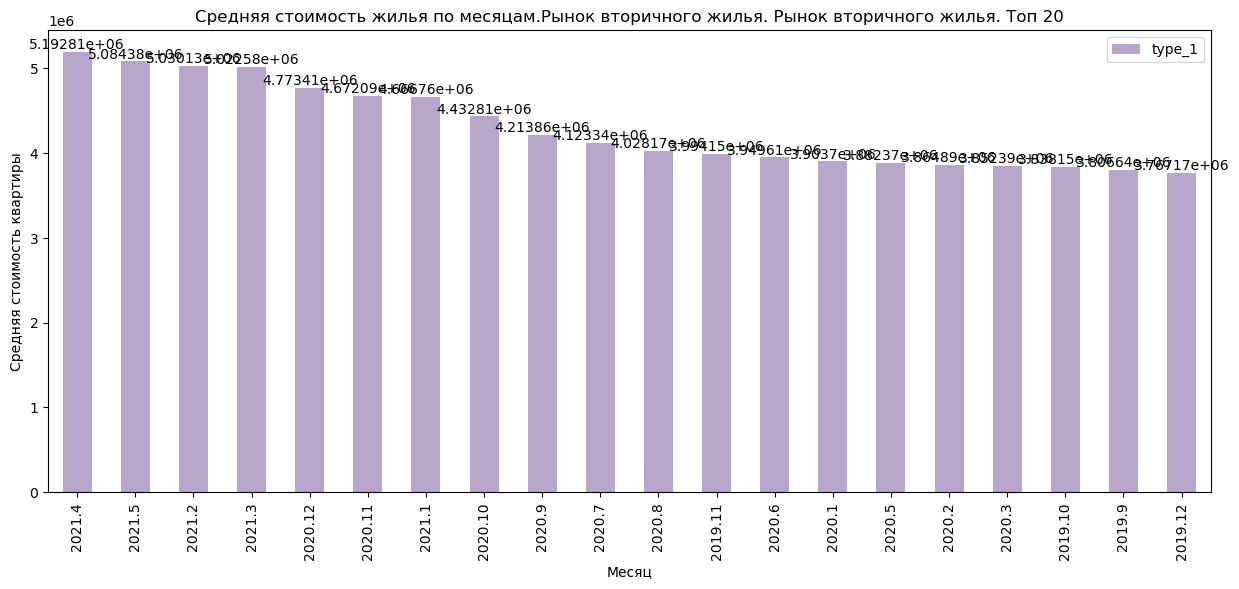

In [154]:
ax = df_price.sort_values('type_1', axis=0, ascending=False).head(20).plot(kind ='bar', x='date', y = 'type_1',title=f'Средняя стоимость жилья по месяцам.Рынок вторичного жилья. Рынок вторичного жилья. Топ 20', figsize=(15, 6), color=(0.6, 0.5, 0.7, 0.7),xlabel='Месяц',ylabel='Средняя стоимость квартиры')
ax.bar_label(ax.containers[0])
plt.show()

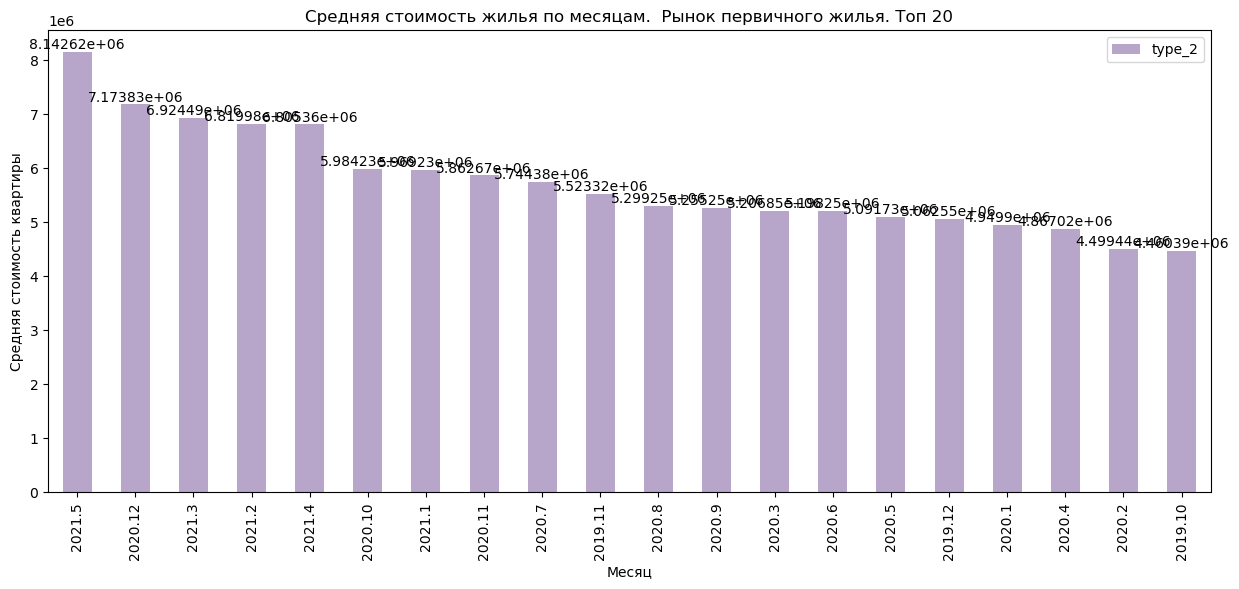

In [155]:
ax = df_price.sort_values('type_2', axis=0, ascending=False).head(20).plot(kind ='bar', x='date', y = 'type_2',title=f'Средняя стоимость жилья по месяцам.  Рынок первичного жилья. Топ 20', figsize=(15, 6), color=(0.6, 0.5, 0.7, 0.7),xlabel='Месяц',ylabel='Средняя стоимость квартиры')
ax.bar_label(ax.containers[0])
plt.show()

Выводы:

1. На рынке первичного жилья лучше всего продавать квартиры в марте, а также зимой.

2. На рынке вторичного жилья лучше всего продавать квартиры весной, а также в феврале.

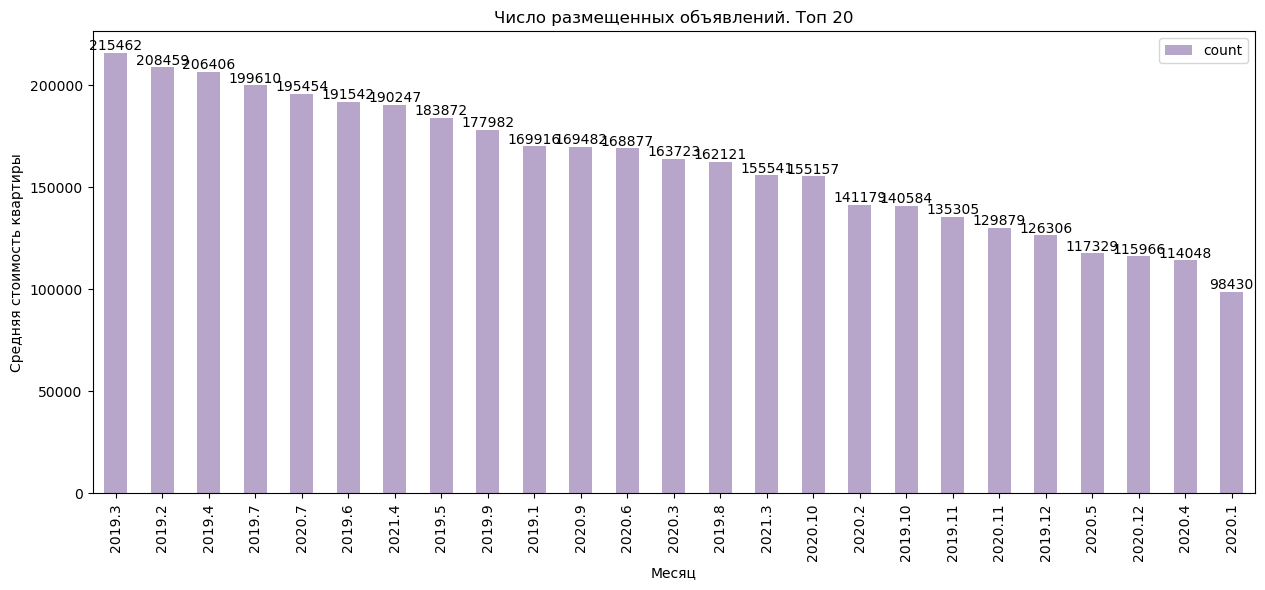

In [156]:
ax = df_price.sort_values('count', axis=0, ascending=False).head(25).plot(kind ='bar', x='date', y = 'count',title=f'Число размещенных объявлений. Топ 20', figsize=(15, 6), color=(0.6, 0.5, 0.7, 0.7),xlabel='Месяц',ylabel='Средняя стоимость квартиры')
ax.bar_label(ax.containers[0])
plt.show()

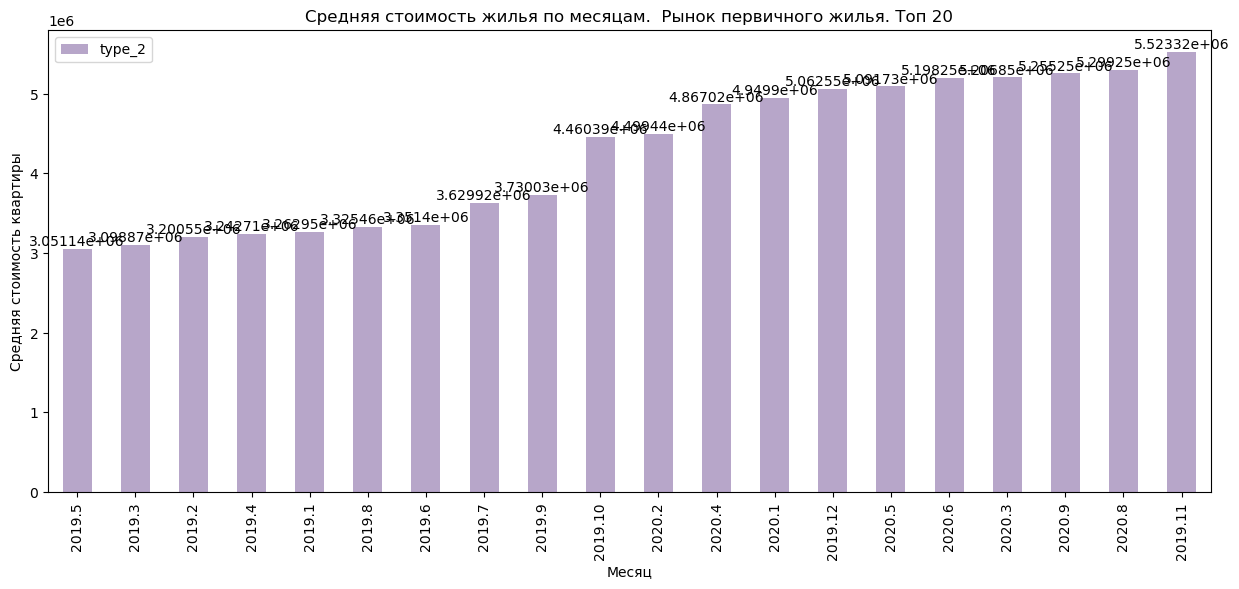

In [157]:
ax = df_price.sort_values('type_2', axis=0, ascending=True).head(20).plot(kind ='bar', x='date', y = 'type_2',title=f'Средняя стоимость жилья по месяцам.  Рынок первичного жилья. Топ 20', figsize=(15, 6), color=(0.6, 0.5, 0.7, 0.7),xlabel='Месяц',ylabel='Средняя стоимость квартиры')
ax.bar_label(ax.containers[0])
plt.show()

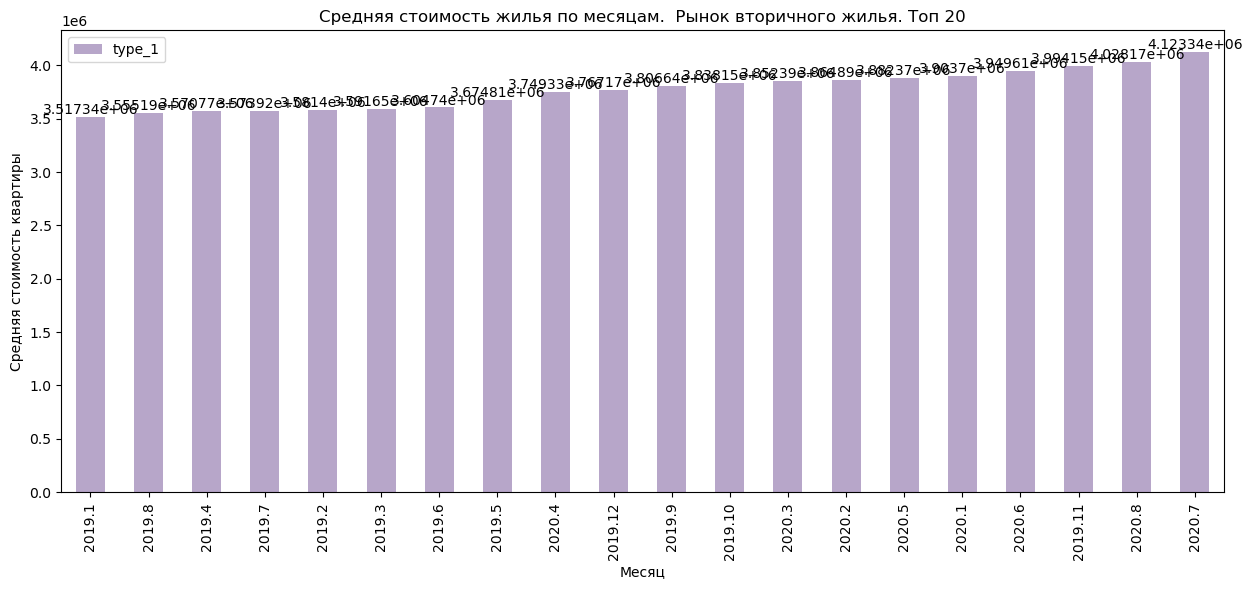

In [158]:
ax = df_price.sort_values('type_1', axis=0, ascending=True).head(20).plot(kind ='bar', x='date', y = 'type_1',title=f'Средняя стоимость жилья по месяцам.  Рынок вторичного жилья. Топ 20', figsize=(15, 6), color=(0.6, 0.5, 0.7, 0.7),xlabel='Месяц',ylabel='Средняя стоимость квартиры')
ax.bar_label(ax.containers[0])
plt.show()

Наиболее дешевые предложения - январь, февраль, в целом начало года. Также в конце лета и весной.

1.Рынок первичного жилья - февраль, январь, весна.

2.Рынок вторичного жилья - аналогично.

В итоге лучший месяц - февраль, наибольшее число предложений.
Видно, что в 2019 году рынок недвижимости был активнее, с каждым годом число объявлений уменьшалось, а цена на жилье - росла. Наибольшее число объявлений было размещено в конце зимы, начале весны 2019 года.

In [159]:
df_m2 = df_m2.dropna()
df_m2.reset_index(drop=True)
df_m2.sort_values('type_1', axis=0, ascending=False).head(20)

date   m2_count    type_1     type_2
3   4.0   803197.0  81211.44  107121.99
1   2.0  1183070.0  76738.16   80766.07
0   1.0  1318220.0  75885.54   82480.74
2   3.0   999855.0  75332.61   80898.18

Как видно, наиболее высокие по стоимости предложения на рынке недвижимости - осенью.

In [160]:
df_m2 = df_m2.dropna()
df_m2.reset_index(drop=True)
df_m2.sort_values('type_2', axis=0, ascending=False).head(20)

date   m2_count    type_1     type_2
3   4.0   803197.0  81211.44  107121.99
0   1.0  1318220.0  75885.54   82480.74
2   3.0   999855.0  75332.61   80898.18
1   2.0  1183070.0  76738.16   80766.07

In [161]:
df_m2 = df_m2.dropna()
df_m2.reset_index(drop=True)
df_m2.sort_values('m2_count', axis=0, ascending=False).head(20)

date   m2_count    type_1     type_2
0   1.0  1318220.0  75885.54   82480.74
1   2.0  1183070.0  76738.16   80766.07
2   3.0   999855.0  75332.61   80898.18
3   4.0   803197.0  81211.44  107121.99

Однако, наиболее активен рынок недвижимости - зимой. Наибольшее число объявлений.

Так, на основании изученной информации - рынок недвижимости более активен во второй половине зимы и весной. Соответсвенно, можно предположить, что покупать квартиры в данной период наиболее выгодно.

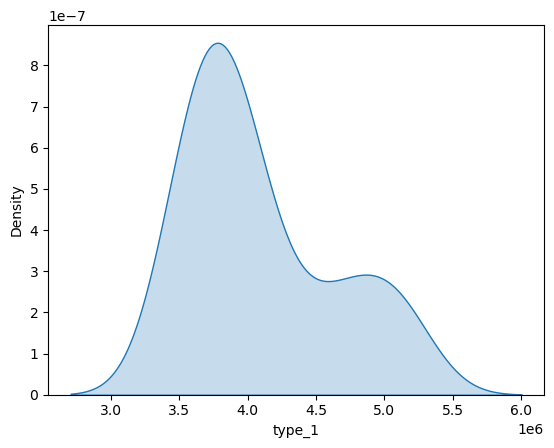

In [163]:
sns.kdeplot(df_price['type_1'], fill=True) #распределение опять ненормальное
plt.show()

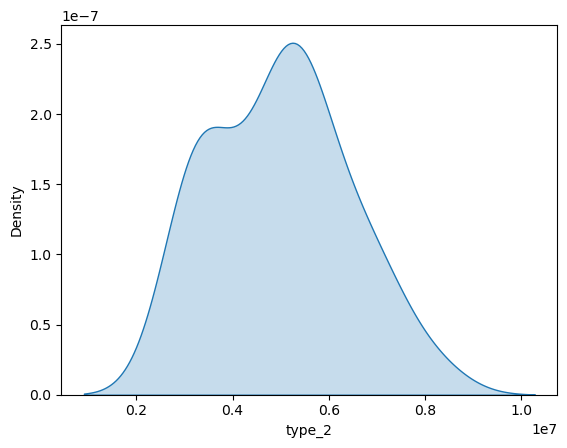

In [164]:
sns.kdeplot(df_price['type_2'], fill=True)
plt.show()

Как видно, наибольшая зависимость есть между годом и средней ценой на квартиру, числом объявлений и годом, числом объявлений и средней стоимостью, числом объявлений и суммарной стоимостью размещенных объявлений.

Можно сделать следующие выводы:

В зимний период цены на квартиры снижаются, а предложения растут. Весной цены растут, а также увеличивается количество предложений. Летом цены снова снижаются. Осенью цены повышаются.

Цены на квартиры имеют выраженную сезонность. Но всё же, не стоит забывать, что цены зависят и от макроэкономических факторов. Это инфляция, курс валюты, уровень доходов населения, ставки по ипотеке и т.д.


## 6. Создайте модель прогноза цены объекта недвижимости.

Строить единую модель для всех регионов - бесмысленно, так как цена за один кваратный метр сильно отличается.

In [66]:
df[(df['reg_name'] == 'Санкт-Петербург')&(df['year'] == 2020)].corr('kendall')

C:\anaconda\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


index     price  building_type     level    levels  \
index          1.000000  0.082478       0.015900 -0.005901 -0.015277   
price          0.082478  1.000000       0.136818 -0.016484 -0.062319   
building_type  0.015900  0.136818       1.000000 -0.053639 -0.074294   
level         -0.005901 -0.016484      -0.053639  1.000000  0.448323   
levels        -0.015277 -0.062319      -0.074294  0.448323  1.000000   
rooms          0.001360  0.517419       0.001403 -0.101200 -0.170333   
area          -0.003624  0.632307       0.063398 -0.052448 -0.091331   
kitchen_area   0.014212  0.399859       0.082680  0.086631  0.146098   
object_type    0.003651  0.003183       0.004811  0.147863  0.259364   
m2             0.152045  0.366404       0.156598  0.045730  0.014524   
year                NaN       NaN            NaN       NaN       NaN   
month          0.955126  0.084765       0.016851 -0.006155 -0.016074   

                  rooms      area  kitchen_area  object_type        m2  year  \
index          0.001360 -0.003624      0.014212     0.003651  0.152045   NaN   
price          0.517419  0.632307      0.399859     0.003183  0.366404   NaN   
building_type  0.001403  0.063398      0.082680     0.004811  0.156598   NaN   
level         -0.101200 -0.052448      0.086631     0.147863  0.045730   NaN   
levels        -0.170333 -0.091331      0.146098     0.259364  0.014524   NaN   
rooms          1.000000  0.735545      0.206346    -0.112675 -0.099805   NaN   
area           0.735545  1.000000      0.367526    -0.040039 -0.003267   NaN   
kitchen_area   0.206346  0.367526      1.000000     0.285667  0.161569   NaN   
object_type   -0.112675 -0.040039      0.285667     1.000000  0.064621   NaN   
m2            -0.099805 -0.003267      0.161569     0.064621  1.000000   NaN   
year                NaN       NaN           NaN          NaN       NaN   1.0   
month          0.000170 -0.004953      0.014865     0.003256  0.158286   NaN   

                  month  
index          0.955126  
price          0.084765  
building_type  0.016851  
level         -0.006155  
levels        -0.016074  
rooms          0.000170  
area          -0.004953  
kitchen_area   0.014865  
object_type    0.003256  
m2             0.158286  
year                NaN  
month          1.000000

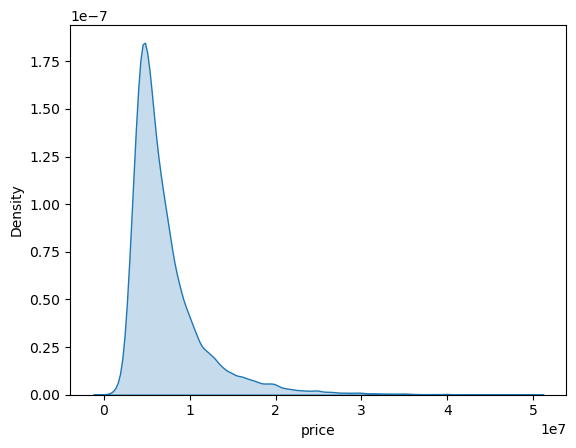

In [222]:
sns.kdeplot(df[(df['reg_name'] == 'Санкт-Петербург')&(df['year'] == 2020)]['price'], fill=True)
plt.show()

Как видно, цена по большей части зависит от площади квартиры, площади кухни, этажа, м2. Будем строить по этим параметрам.
Распределение опять ненормальное.

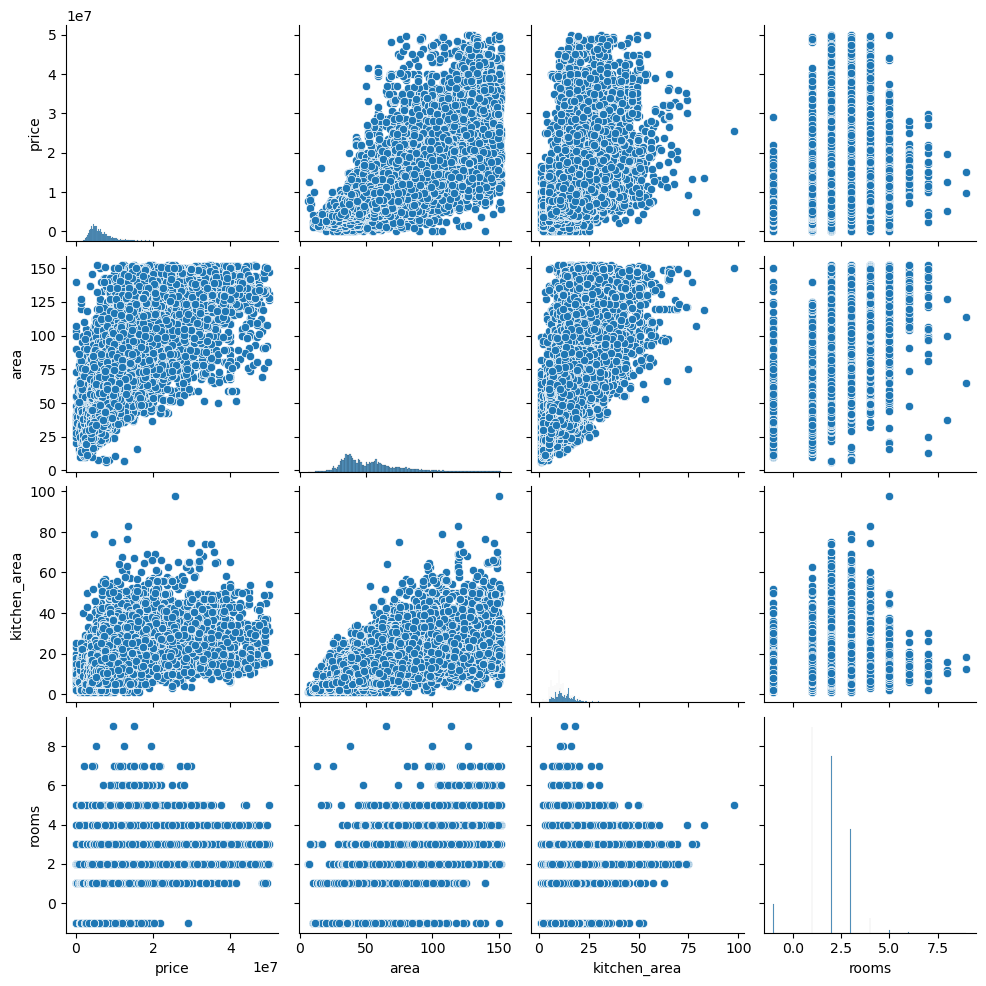

In [67]:
# строим pairplot
plt.figsize=(10, 10)
sns.pairplot(df[(df['reg_name'] == 'Санкт-Петербург')&(df['year'] == 2020)][['price','area','kitchen_area','rooms']])

In [68]:
df_new_lin = df[(df['reg_name'] == 'Санкт-Петербург')&(df['year'] == 2020)]


In [69]:
# раздяем данные на признаки
x_new=df_new_lin[['index','price','area','kitchen_area','rooms','month']]
x_new

index    price  area  kitchen_area  rooms  month
616502  2234362  8211350  80.9          11.9      3      1
616503  2234364  2850000  27.0           8.0     -1      1
616504  2234424   600000  32.8           7.4      1      1
616505  2234429  5300000  43.0           6.0      3      1
616506  2234479  8990000  74.9          13.7      3      1
...         ...      ...   ...           ...    ...    ...
785485  4038268  4716480  35.9           8.0     -1     12
785486  4038303  7998000  60.0          10.5      2     12
785487  4038304  4160000  34.0           7.0      1     12
785488  4038305  4300000  31.0           6.0      1     12
785489  4038306  5200000  33.7           8.5      1     12

[168988 rows x 6 columns]

In [70]:
#разбиваем данные по временному криетрию - по месяцам так, чтобы в выборку попали 20% всех значений пропорционально.
x_new_test = x_new.groupby('month', group_keys=False).apply(lambda x: x.sample(frac=0.2))
x_new_test

index     price   area  kitchen_area  rooms  month
617833  2249718   1980000   18.0           3.0     -1      1
625604  2327371   3700000   32.6           9.0      1      1
619446  2266625   9320950   44.0          13.5      1      1
620354  2275072   3570000   40.4          10.7      1      1
621154  2283562   4100000   36.0          10.5      1      1
...         ...       ...    ...           ...    ...    ...
776198  3925927  13100000  114.0          17.2      4     12
777409  3938165  10237992   55.9          13.8      2     12
785094  4031020   4600000   46.0           7.0      2     12
782410  3996843   5149000   54.5          10.0      2     12
779295  3957477   4650269   33.5          10.4      1     12

[33800 rows x 6 columns]

In [71]:
x_new_train = x_new[~x_new.isin(x_new_test)].dropna()
x_new_train

index      price  area  kitchen_area  rooms  month
616502  2234362.0  8211350.0  80.9          11.9    3.0    1.0
616503  2234364.0  2850000.0  27.0           8.0   -1.0    1.0
616504  2234424.0   600000.0  32.8           7.4    1.0    1.0
616506  2234479.0  8990000.0  74.9          13.7    3.0    1.0
616507  2234480.0  3580000.0  44.2           5.5    2.0    1.0
...           ...        ...   ...           ...    ...    ...
785484  4038259.0  4300000.0  45.0           6.5    2.0   12.0
785485  4038268.0  4716480.0  35.9           8.0   -1.0   12.0
785487  4038304.0  4160000.0  34.0           7.0    1.0   12.0
785488  4038305.0  4300000.0  31.0           6.0    1.0   12.0
785489  4038306.0  5200000.0  33.7           8.5    1.0   12.0

[135188 rows x 6 columns]

In [83]:
x_test = x_new_test[['area','kitchen_area','rooms']]
x_train =  x_new_train[['area','kitchen_area','rooms']]
y_train = x_new_train['price']
y_test = x_new_test['price']

In [84]:
x_train

area  kitchen_area  rooms
616502  80.9          11.9    3.0
616503  27.0           8.0   -1.0
616504  32.8           7.4    1.0
616506  74.9          13.7    3.0
616507  44.2           5.5    2.0
...      ...           ...    ...
785484  45.0           6.5    2.0
785485  35.9           8.0   -1.0
785487  34.0           7.0    1.0
785488  31.0           6.0    1.0
785489  33.7           8.5    1.0

[135188 rows x 3 columns]

In [85]:
#разделяем данные на обучающую и валидационную выборку
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [86]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_train_st

array([[ 1.10367328, -0.05192912,  1.19871588],
       [-1.16943514, -0.71296422, -2.54475398],
       [-0.92483349, -0.81466192, -0.67301905],
       ...,
       [-0.87422625, -0.88246039, -0.67301905],
       [-1.00074435, -1.05195657, -0.67301905],
       [-0.88687806, -0.62821613, -0.67301905]])

In [87]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

In [88]:
model = Ridge()

# обучим нашу модель

model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)
predictions = model.predict(x_test_st)
# проверяем r2
r2 = r2_score(y_test, predictions) 
r2

[ 4221597.34292612   797478.58540385 -1103813.14297769] 7363044.194455129


0.6847795800578071

In [89]:
# делаем прогнозы
predictions = model.predict(x_test_st)

In [92]:
x=df_new_lin[['area','kitchen_area','rooms']]
x_t= scaler.fit_transform(x)
predict = model.predict(x_t)
predict =[round(v,1) for v in predict]

In [93]:
df_for_analicit = pd.DataFrame({'price': df_new_lin['price'].tolist(), 'predictions': predict})
df_for_analicit['remain'] = df_for_analicit['price'] - df_for_analicit['predictions']

In [94]:
y_test = df_for_analicit['price']
predictions = df_for_analicit['predictions']

C:\Users\Админ\AppData\Local\Temp\ipykernel_13952\472433138.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", color='r')


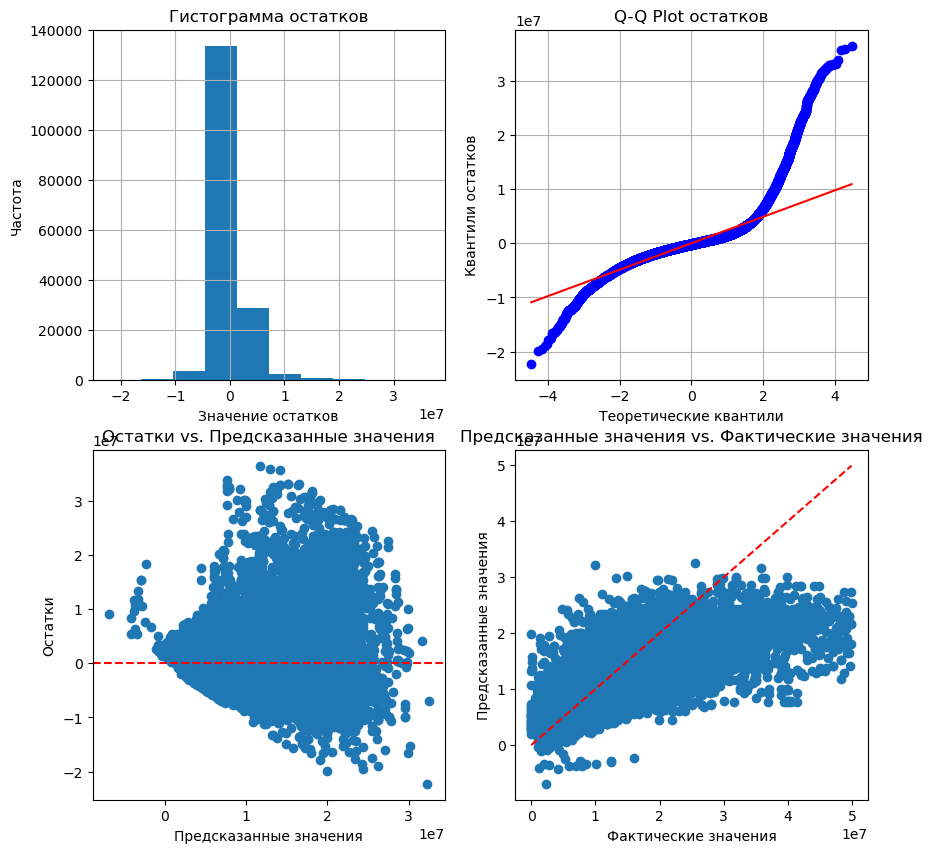

In [95]:
import statsmodels.api as sm

# Получение остатков модели
residuals = y_test - predictions

# Расчет стандартизированных остатков
stand_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.subplots(figsize=(10, 10))


# Распределение остатков
plt.subplot(2, 2, 1)
plt.hist(residuals)
plt.xlabel('Значение остатков')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)


# График остатков vs. предсказанных значений
plt.subplot(2, 2, 2)
st.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили остатков')
plt.title('Q-Q Plot остатков')
plt.grid(True)

#График остатков относительно прогноза
plt.subplot(2, 2, 3)
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs. Предсказанные значения')

# Предсказанные и фактические значения
plt.subplot(2, 2, 4)
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения vs. Фактические значения')
plt.show()

Как видно, прогноз вышел не очень хорошим. Сильный разброс значений, большие остатки.